In [138]:
!pip install category_encoders
!pip install matplotlib-venn
!pip install xgboost


In [139]:
# from google.colab import drive
# drive.mount('/content/drive')

In [140]:
# !pip install --upgrade scikit-learn==1.4.0 -q

In [141]:
!pip install category_encoders


In [142]:
import sys
sys.executable

'C:\\Users\\MD.ZIA\\anaconda3\\python.exe'

In [143]:
from sklearn import set_config
set_config(display='diagram')

In [144]:
# import sys
# sys.path.append('c:\\users\\23637839\\appdata\\roaming\\python\\python310\\site-packages')


In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import balanced_accuracy_score
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
# import sklearn
# sklearn.set_config(transform_output="pandas")
# import sys
# if 'google.colab' in sys.modules:
#     !pip install -q dtreeviz
# import dtreeviz


In [146]:
from sklearn.compose import ColumnTransformer
import sklearn
sklearn.set_config('pandas')

In [147]:
# import pandas as pd
# from sklearn.base import TransformerMixin

# class PandasTransformer(TransformerMixin):
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X):
#         # Convert the output to a pandas DataFrame
#         return pd.DataFrame(X)

In [148]:
import pandas as pd

# Assuming the CSV file is in the same directory as your notebook
data = pd.read_csv('data.csvcleaned_data')




In [149]:
data.head()

mileage standard_colour standard_make     standard_model  \
0       0.0            Grey         Volvo               XC90   
1  108230.0            Blue        Jaguar                 XF   
2    7800.0            Grey         SKODA               Yeti   
3   45000.0           Brown      Vauxhall              Mokka   
4   64000.0            Grey    Land Rover  Range Rover Sport   

   vehicle_condition  price  body_type  crossover_car_and_van  \
0                  1  73970        SUV                      0   
1                  0   7000     Saloon                      0   
2                  0  14000        SUV                      0   
3                  0   7995  Hatchback                      0   
4                  0  26995        SUV                      0   

               fuel_type   Age  
0  Petrol Plug-in Hybrid   1.0  
1                 Diesel  10.0  
2                 Petrol   4.0  
3                 Diesel   5.0  
4                 Diesel   6.0

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393496 entries, 0 to 393495
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                393496 non-null  float64
 1   standard_colour        393496 non-null  object 
 2   standard_make          393496 non-null  object 
 3   standard_model         393496 non-null  object 
 4   vehicle_condition      393496 non-null  int64  
 5   price                  393496 non-null  int64  
 6   body_type              393496 non-null  object 
 7   crossover_car_and_van  393496 non-null  int64  
 8   fuel_type              393496 non-null  object 
 9   Age                    393496 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 30.0+ MB


In [151]:
data.dtypes

mileage                  float64
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition          int64
price                      int64
body_type                 object
crossover_car_and_van      int64
fuel_type                 object
Age                      float64
dtype: object

In [152]:
data.describe() , data.describe(include='O')

(             mileage  vehicle_condition         price  crossover_car_and_van  \
 count  393496.000000      393496.000000  3.934960e+05          393496.000000   
 mean    35418.901541           0.079414  1.741316e+04               0.004084   
 std     30804.757097           0.270384  2.457645e+04               0.063775   
 min         0.000000           0.000000  1.200000e+02               0.000000   
 25%     10100.000000           0.000000  7.750750e+03               0.000000   
 50%     27844.500000           0.000000  1.293800e+04               0.000000   
 75%     54314.000000           0.000000  2.044200e+04               0.000000   
 max    126523.000000           1.000000  2.850000e+06               1.000000   
 
                  Age  
 count  393496.000000  
 mean        5.402810  
 std         4.245737  
 min         1.000000  
 25%         2.000000  
 50%         4.000000  
 75%         7.000000  
 max        71.000000  ,
        standard_colour standard_make standard_model

In [153]:
d1=data.copy()

In [154]:
len(d1['fuel_type'].unique())#.value_counts().,'body_type']

8

In [155]:
len(d1['body_type'].unique())

16

In [156]:
len(d1['standard_colour'].unique())

22

In [157]:
z=d1.drop(columns=['price'])
a=d1['price']

In [158]:
poly_features=['mileage','Age']

In [159]:
from sklearn.preprocessing import PolynomialFeatures

In [160]:
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True))
])

In [161]:
preprocessor = ColumnTransformer(
    transformers=[
        ('poly', poly_pipeline, poly_features)
    ])

In [162]:
z1=preprocessor.fit_transform(z[poly_features])
z1=pd.DataFrame(z1)

In [163]:
z=pd.concat([z,z1],axis=1)
z.head()

mileage standard_colour standard_make     standard_model  \
0       0.0            Grey         Volvo               XC90   
1  108230.0            Blue        Jaguar                 XF   
2    7800.0            Grey         SKODA               Yeti   
3   45000.0           Brown      Vauxhall              Mokka   
4   64000.0            Grey    Land Rover  Range Rover Sport   

   vehicle_condition  body_type  crossover_car_and_van              fuel_type  \
0                  1        SUV                      0  Petrol Plug-in Hybrid   
1                  0     Saloon                      0                 Diesel   
2                  0        SUV                      0                 Petrol   
3                  0  Hatchback                      0                 Diesel   
4                  0        SUV                      0                 Diesel   

    Age         0     1          2  
0   1.0       0.0   1.0        0.0  
1  10.0  108230.0  10.0  1082300.0  
2   4.0    7800.0   4.0    31200.0  
3   5.0   45000.0   5.0   225000.0  
4   6.0   64000.0   6.0   384000.0

In [164]:
feature_mapping = {
    0: 'poly_mile',
    1: 'poly_Age',
    2: 'poly_mile_Age',
}

In [165]:
z.columns = [feature_mapping[col] if col in feature_mapping else col for col in z.columns]

In [166]:
z.head()

mileage standard_colour standard_make     standard_model  \
0       0.0            Grey         Volvo               XC90   
1  108230.0            Blue        Jaguar                 XF   
2    7800.0            Grey         SKODA               Yeti   
3   45000.0           Brown      Vauxhall              Mokka   
4   64000.0            Grey    Land Rover  Range Rover Sport   

   vehicle_condition  body_type  crossover_car_and_van              fuel_type  \
0                  1        SUV                      0  Petrol Plug-in Hybrid   
1                  0     Saloon                      0                 Diesel   
2                  0        SUV                      0                 Petrol   
3                  0  Hatchback                      0                 Diesel   
4                  0        SUV                      0                 Diesel   

    Age  poly_mile  poly_Age  poly_mile_Age  
0   1.0        0.0       1.0            0.0  
1  10.0   108230.0      10.0      1082300.0  
2   4.0     7800.0       4.0        31200.0  
3   5.0    45000.0       5.0       225000.0  
4   6.0    64000.0       6.0       384000.0

In [167]:
X_train, X_test, Y_train, Y_test = train_test_split(
  z, a, test_size=0.25, random_state=0
)

In [168]:
X_train

mileage standard_colour standard_make   standard_model  \
63785   79030.0           Green        Nissan          X-Trail   
278908  33118.0           White        Toyota             AYGO   
22379   32864.0            Blue    Volkswagen             Golf   
366301   6617.0             Red    Land Rover  Discovery Sport   
60625       0.0          Silver          Audi               A3   
...         ...             ...           ...              ...   
359783  41427.0           Black         SKODA            Fabia   
358083   3500.0           Black          Audi               Q7   
152315   9503.0            Grey        Nissan            Micra   
117952   1976.0             Red        Toyota           Prius+   
305711  15000.0          Silver         Volvo              V40   

        vehicle_condition  body_type  crossover_car_and_van  \
63785                   0        SUV                      0   
278908                  0  Hatchback                      0   
22379                   0  Hatchback                      0   
366301                  0        SUV                      0   
60625                   1  Hatchback                      0   
...                   ...        ...                    ...   
359783                  0  Hatchback                      0   
358083                  0        SUV                      0   
152315                  0  Hatchback                      0   
117952                  0        MPV                      0   
305711                  0  Hatchback                      0   

                    fuel_type  Age  poly_mile  poly_Age  poly_mile_Age  
63785                  Diesel  7.0    79030.0       7.0       553210.0  
278908                 Petrol  7.0    33118.0       7.0       231826.0  
22379   Petrol Plug-in Hybrid  3.0    32864.0       3.0        98592.0  
366301                 Diesel  2.0     6617.0       2.0        13234.0  
60625                  Petrol  1.0        0.0       1.0            0.0  
...                       ...  ...        ...       ...            ...  
359783                 Diesel  9.0    41427.0       9.0       372843.0  
358083                 Diesel  1.0     3500.0       1.0         3500.0  
152315                 Petrol  4.0     9503.0       4.0        38012.0  
117952          Petrol Hybrid  1.0     1976.0       1.0         1976.0  
305711                 Diesel  5.0    15000.0       5.0        75000.0  

[295122 rows x 12 columns]

In [169]:
X_test.shape

(98374, 12)

In [170]:
# numerical_features = X_train.select_dtypes(include='number').columns
# categorical_features = X_train.drop(columns=['fuel_type']).select_dtypes(exclude='number').columns
# poly_features=['mileage','Age']
# column_to_encode = 'fuel_type'
# #columns_to_target=['standard_make','standard_model','standard_colour','body_type']


In [171]:
# categorical_features

Index(['standard_colour', 'standard_make', 'standard_model', 'body_type'], dtype='object')

In [172]:
from sklearn.base import BaseEstimator, TransformerMixin
class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='mean'):
        self.strategy = strategy
        self.imputer = SimpleImputer(strategy=self.strategy)

    def fit(self, X, y=None):
        self.imputer.fit(X)
        return self

    def transform(self, X):
        return self.imputer.transform(X)

    def get_feature_names_out(self, input_features=None):
        return input_features


In [173]:
numerical_features = ['mileage', 'vehicle_condition', 'crossover_car_and_van', 'Age']

# Define categorical features
categorical_features = ['standard_make', 'standard_model', 'standard_colour', 'body_type']

# Define the feature to pass through one-hot encoding
one_hot_feature = ['fuel_type']

# Pipeline for numerical features
numerical_pipeline = Pipeline([
    ('imputer', CustomImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
])

# Pipeline for categorical features
categorical_pipeline = Pipeline([
    ('target_encoding', ce.TargetEncoder(cols=categorical_features)),
])

# Pipeline for one-hot feature
one_hot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore')),
])

# Create preprocessor with ColumnTransformer
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features),
    ('onehot', one_hot_pipeline, one_hot_feature)
])

# Fit and transform the training data
X_train_proc = preprocessor.fit_transform(X_train,Y_train)

# Transform the test data
X_test_proc = preprocessor.transform(X_test)

In [174]:
feature_names_out = preprocessor.get_feature_names_out()
X_train_proc_df = pd.DataFrame(X_train_proc, columns=feature_names_out)
X_test_proc_df = pd.DataFrame(X_test_proc, columns=feature_names_out)

In [175]:
# X_train_proc=pd.DataFrame(X_train_proc)
X_train_proc_df

numerical__mileage  numerical__vehicle_condition  \
0                 0.624630                           0.0   
1                 0.261755                           0.0   
2                 0.259747                           0.0   
3                 0.052299                           0.0   
4                 0.000000                           1.0   
...                    ...                           ...   
295117            0.327427                           0.0   
295118            0.027663                           0.0   
295119            0.075109                           0.0   
295120            0.015618                           0.0   
295121            0.118556                           0.0   

        numerical__crossover_car_and_van  numerical__Age  \
0                                    0.0        0.090909   
1                                    0.0        0.090909   
2                                    0.0        0.030303   
3                                    0.0        0.015152   
4                                    0.0        0.000000   
...                                  ...             ...   
295117                               0.0        0.121212   
295118                               0.0        0.000000   
295119                               0.0        0.045455   
295120                               0.0        0.000000   
295121                               0.0        0.060606   

        categorical__standard_make  categorical__standard_model  \
0                     11509.863923                 16250.836345   
1                     11575.506430                  6739.508096   
2                     14319.885978                 14493.014078   
3                     36715.903099                 28644.352288   
4                     20857.206134                 14933.336638   
...                            ...                          ...   
295117                13835.877220                  8821.718007   
295118                20857.206134                 32907.484581   
295119                11509.863923                  7266.661479   
295120                11575.506430                 19959.806368   
295121                25718.158835                 11589.021412   

        categorical__standard_colour  categorical__body_type  \
0                       18714.094439            22684.262397   
1                       16717.768972            10547.073058   
2                       16857.041080            10547.073058   
3                       15023.766544            22684.262397   
4                       13903.738450            10547.073058   
...                              ...                     ...   
295117                  19390.739698            10547.073058   
295118                  19390.739698            22684.262397   
295119                  20023.922187            10547.073058   
295120                  15023.766544            11525.011280   
295121                  13903.738450            10547.073058   

        onehot__fuel_type_Bi Fuel  onehot__fuel_type_Diesel  \
0                             0.0                       1.0   
1                             0.0                       0.0   
2                             0.0                       0.0   
3                             0.0                       1.0   
4                             0.0                       0.0   
...                           ...                       ...   
295117                        0.0                       1.0   
295118                        0.0                       1.0   
295119                        0.0                       0.0   
295120                        0.0                       0.0   
295121                        0.0                       1.0   

        onehot__fuel_type_Diesel Hybrid  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                   

In [176]:
# X_test_proc=pd.DataFrame(X_test_proc)
X_test_proc_df

numerical__mileage  numerical__vehicle_condition  \
0                0.000000                           1.0   
1                0.003912                           0.0   
2                0.039519                           0.0   
3                0.018534                           0.0   
4                0.124547                           0.0   
...                   ...                           ...   
98369            0.087676                           0.0   
98370            0.376675                           0.0   
98371            0.746900                           0.0   
98372            0.056946                           0.0   
98373            0.219122                           0.0   

       numerical__crossover_car_and_van  numerical__Age  \
0                                   0.0        0.000000   
1                                   0.0        0.000000   
2                                   0.0        0.000000   
3                                   0.0        0.000000   
4                                   0.0        0.045455   
...                                 ...             ...   
98369                               0.0        0.015152   
98370                               0.0        0.045455   
98371                               0.0        0.090909   
98372                               0.0        0.030303   
98373                               0.0        0.045455   

       categorical__standard_make  categorical__standard_model  \
0                    10908.649342                 13111.019749   
1                   107196.502773                101753.999312   
2                     9124.950461                 14657.584416   
3                    20370.625485                 30644.301418   
4                    20857.206134                 19350.466381   
...                           ...                          ...   
98369                10024.763477                 12264.541440   
98370                20857.206134                 32907.484581   
98371                20370.625485                 19717.975806   
98372                20857.206134                 33967.904437   
98373                13835.877220                 27158.335470   

       categorical__standard_colour  categorical__body_type  \
0                      16857.041080            22684.262397   
1                      19390.739698            33637.905314   
2                      16717.768972            22684.262397   
3                      13903.738450            22684.262397   
4                      19390.739698            33637.905314   
...                             ...                     ...   
98369                  20023.922187            22684.262397   
98370                  19390.739698            22684.262397   
98371                  13903.738450            26951.357440   
98372                  16857.041080            20067.191510   
98373                  16857.041080            22684.262397   

       onehot__fuel_type_Bi Fuel  onehot__fuel_type_Diesel  \
0                            0.0                       0.0   
1                            0.0                       0.0   
2                            0.0                       0.0   
3                            0.0                       1.0   
4                            0.0                       0.0   
...                          ...                       ...   
98369                        0.0                       0.0   
98370                        0.0                       1.0   
98371                        0.0                       0.0   
98372                        0.0                       1.0   
98373                        0.0                       1.0   

       onehot__fuel_type_Diesel Hybrid  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
...                                ...   


In [177]:
# X_train_un=X_train.drop(columns=['numerical__poly_mile','numerical__poly_Age','numerical__poly_mile_Age'])
# X_test_un=X_test.drop(columns=['numerical__poly_mile','numerical__poly_Age','numerical__poly_mile_Age'])

In [178]:
X_train_un=X_train_proc_df.copy()
X_test_un=X_test_proc_df.copy()

In [179]:
X_test_un.shape

(98374, 16)

Feature Selection using RFECV method

# Feature Selection using RFECV method

Without RFECV

In [180]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [181]:
rfecv_noFS = Pipeline(
    steps=[
      ("regr", LinearRegression())
    ]
)

In [182]:
rfecv_noFS.fit(X_train_un,Y_train)

Pipeline(steps=[('regr', LinearRegression())])

In [183]:
Y_pred_rfecv=rfecv_noFS.predict(X_test_un)
Y_pred_rfecv

array([ 23087.01329682, 127016.56482755,  17093.67104483, ...,
        11018.63604138,  37208.78042211,  25559.59343859])

In [184]:
estimator = rfecv_noFS.named_steps['regr']

# Calculate R^2 score on the test data
r2_test = r2_score(Y_test, Y_pred_rfecv)

# Calculate R^2 score on the training data
r2_train = estimator.score(X_train_un, Y_train)

print("R^2 Score on Test Data:", r2_test)
print("R^2 Score on Training Data:", r2_train)

R^2 Score on Test Data: 0.5765316099674754
R^2 Score on Training Data: 0.5725837808787206


In [185]:
mean_absolute_error(Y_test, Y_pred_rfecv), mean_absolute_error(Y_train, rfecv_noFS.predict(X_train_un))

(4920.681197402559, 4848.326157195152)

In [186]:
evaluation = cross_validate(
    rfecv_noFS, X_train_un, Y_train, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)
(
    (-evaluation['test_score'].mean(), evaluation['test_score'].std(),
    -evaluation['train_score'].mean(), evaluation['train_score'].std())
)

(4850.258103859745, 32.81137631498995, 4850.168083869409, 47.0004629555445)

In [133]:
!pip install --upgrade scikit-learn

     ---------------------------------------- 10.6/10.6 MB 3.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstalled scikit-learn-1.4.0


With REFCV

In [136]:
# !pip uninstall scikit-learn
# !pip install scikit-learn


^C
^C


In [187]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

ImportError: cannot import name '_is_pandas_df' from 'sklearn.utils' (C:\Users\MD.ZIA\anaconda3\lib\site-packages\sklearn\utils\__init__.py)

In [153]:
model = LinearRegression()
refcv_rfe = Pipeline(
    steps=[
        ("featsel", RFECV(model, step=1, cv=5)),
        ("regr", LinearRegression())
    ]
)

In [154]:
refcv_rfe.fit(X_train_un,Y_train)

Pipeline(steps=[('featsel', RFECV(cv=5, estimator=LinearRegression())),
                ('regr', LinearRegression())])

In [155]:
Y_pred_with=refcv_rfe.predict(X_test_un)

In [156]:
refcv_rfe['featsel'].get_feature_names_out()

array(['categorical__standard_colour', 'categorical__standard_make',
       'categorical__standard_model', 'categorical__body_type',
       'numerical__mileage', 'numerical__vehicle_condition',
       'numerical__crossover_car_and_van', 'numerical__Age',
       'fuel_type_Bi Fuel', 'fuel_type_Diesel', 'fuel_type_Diesel Hybrid',
       'fuel_type_Diesel Plug-in Hybrid', 'fuel_type_Electric',
       'fuel_type_Petrol', 'fuel_type_Petrol Hybrid',
       'fuel_type_Petrol Plug-in Hybrid'], dtype=object)

In [157]:
len(refcv_rfe['featsel'].get_feature_names_out())

16

In [158]:
X_train_un

categorical__standard_colour  categorical__standard_make  \
0                       18714.094439                11509.863923   
1                       16717.768972                11575.506430   
2                       16857.041080                14319.885978   
3                       15023.766544                36715.903099   
4                       13903.738450                20857.206134   
...                              ...                         ...   
295117                  19390.739698                13835.877220   
295118                  19390.739698                20857.206134   
295119                  20023.922187                11509.863923   
295120                  15023.766544                11575.506430   
295121                  13903.738450                25718.158835   

        categorical__standard_model  categorical__body_type  \
0                      16250.836345            22684.262397   
1                       6739.508096            10547.073058   
2                      14493.014078            10547.073058   
3                      28644.352288            22684.262397   
4                      14933.336638            10547.073058   
...                             ...                     ...   
295117                  8821.718007            10547.073058   
295118                 32907.484581            22684.262397   
295119                  7266.661479            10547.073058   
295120                 19959.806368            11525.011280   
295121                 11589.021412            10547.073058   

        numerical__mileage  numerical__vehicle_condition  \
0                 0.624630                           0.0   
1                 0.261755                           0.0   
2                 0.259747                           0.0   
3                 0.052299                           0.0   
4                 0.000000                           1.0   
...                    ...                           ...   
295117            0.327427                           0.0   
295118            0.027663                           0.0   
295119            0.075109                           0.0   
295120            0.015618                           0.0   
295121            0.118556                           0.0   

        numerical__crossover_car_and_van  numerical__Age  fuel_type_Bi Fuel  \
0                                    0.0        0.090909                0.0   
1                                    0.0        0.090909                0.0   
2                                    0.0        0.030303                0.0   
3                                    0.0        0.015152                0.0   
4                                    0.0        0.000000                0.0   
...                                  ...             ...                ...   
295117                               0.0        0.121212                0.0   
295118                               0.0        0.000000                0.0   
295119                               0.0        0.045455                0.0   
295120                               0.0        0.000000                0.0   
295121                               0.0        0.060606                0.0   

        fuel_type_Diesel  fuel_type_Diesel Hybrid  \
0                    1.0                      0.0   
1                    0.0                      0.0   
2                    0.0                      0.0   
3                    1.0                      0.0   
4                    0.0                      0.0   
...                  ...                      ...   
295117               1.0                      0.0   
295118               1.0                      0.0   
295119               0.0                      0.0   
295120               0.0                      0.0   
295121               1.0                      0.0   

        fuel_type_Diesel Plug-in Hybrid  fuel_type_Electric  fuel_type_Petrol  \
0                                   0.0       

In [159]:
# refcv_rfe['featsel'].transform(X_train).head()

In [160]:
estimator = refcv_rfe.named_steps['regr']

# Calculate R^2 score on the test data
r2_test = r2_score(Y_test, Y_pred_with)

# Calculate R^2 score on the training data
r2_train = estimator.score(X_train_un, Y_train)

print("R^2 Score on Test Data:", r2_test)
print("R^2 Score on Training Data:", r2_train)

R^2 Score on Test Data: 0.5765316099675363
R^2 Score on Training Data: 0.5725837808787205


In [161]:
mean_absolute_error(Y_test, refcv_rfe.predict(X_test_un)), mean_absolute_error(Y_train, refcv_rfe.predict(X_train_un))

(4920.681197404071, 4848.326157196766)

In [162]:
eval_results = cross_validate(
    refcv_rfe, X_train_un, Y_train, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)
(
    (-eval_results['test_score'].mean(), eval_results['test_score'].std(),
    -eval_results['train_score'].mean(), eval_results['train_score'].std())
)

(4850.258103860285, 32.81137631374737, 4850.1680838699895, 47.00046295656853)

In [163]:
n_scores = len(refcv_rfe['featsel'].cv_results_["mean_test_score"])
n_scores

16

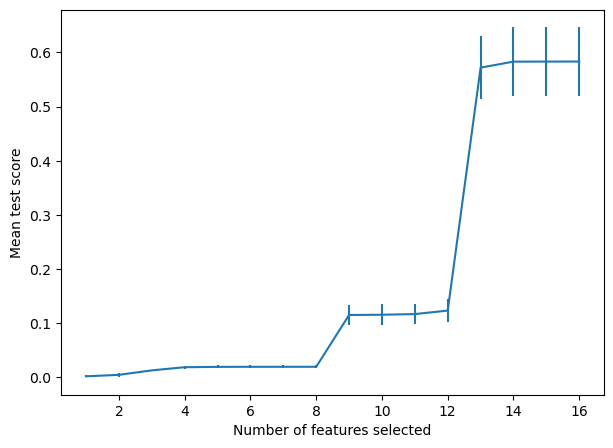

In [164]:
fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    refcv_rfe['featsel'].cv_results_["mean_test_score"],
    yerr=refcv_rfe['featsel'].cv_results_["std_test_score"],
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");
# plt.xlim(0,30)
# plt.ylim(0,0.3)

In [165]:
 refcv_rfe['featsel'].ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [166]:
 refcv_rfe['featsel'].ranking_.shape

(16,)

In [167]:
np.argsort(refcv_rfe['featsel'].ranking_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [168]:
X_train_un.columns[ np.argsort(refcv_rfe['featsel'].ranking_) ]

Index(['categorical__standard_colour', 'categorical__standard_make',
       'categorical__standard_model', 'categorical__body_type',
       'numerical__mileage', 'numerical__vehicle_condition',
       'numerical__crossover_car_and_van', 'numerical__Age',
       'fuel_type_Bi Fuel', 'fuel_type_Diesel', 'fuel_type_Diesel Hybrid',
       'fuel_type_Diesel Plug-in Hybrid', 'fuel_type_Electric',
       'fuel_type_Petrol', 'fuel_type_Petrol Hybrid',
       'fuel_type_Petrol Plug-in Hybrid'],
      dtype='object')

Best k

In [169]:
from sklearn.feature_selection import SelectKBest, f_regression

In [170]:
# regr_bestk = Pipeline(
#     steps=[
#         ("featsel", SelectKBest(f_regression, k=25)),
#         ("regr", LinearRegression())
#     ]
# )

In [171]:
# regr_bestk.fit(X_train,Y_train)

In [172]:
# regr_bestk['featsel'].get_feature_names_out()

In [173]:
# len(regr_bestk['featsel'].get_feature_names_out())

In [174]:
# regr_bestk['featsel'].transform(X_train).head()

In [175]:
# regr_bestk.score(X_test, Y_test),regr_bestk.score(X_train, Y_train)

In [176]:
# mean_absolute_error(Y_test, regr_bestk.predict(X_test))

In [177]:
# eval_results1 = cross_validate(
#     regr_bestk, X_train, Y_train, cv=5,
#     scoring='neg_mean_absolute_error',
#     return_train_score=True
# )
# (
#     (-eval_results1['test_score'].mean(), eval_results1['test_score'].std(),
#     -eval_results1['train_score'].mean(), eval_results1['train_score'].std())
# )

In [178]:
# numeric_transformer_n.fit_transform(X_train[numeric_features_n]).head()

In [179]:
# mean_absolute_error(y_test, regr_rfe.predict(X_test)), mean_absolute_error(y_train, regr_rfe.predict(X_train))

In [180]:
# categorical_features_n = X_train.select_dtypes(include='object').columns.tolist()

In [181]:
# categorical_features_n

In [182]:
# make sure to use IQR for mileage
# transform standard_colur using one hot encoding
#

**Random Forest**

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [185]:
!pip install xgboost

In [186]:
rf_noFS = Pipeline(
    steps=[
      ("rf", RandomForestRegressor())
    ]
)

In [187]:
rf_noFS.fit(X_train_un,Y_train)

Pipeline(steps=[('rf', RandomForestRegressor())])

In [188]:
Y_pred_rf=rf_noFS.predict(X_test_un)

In [189]:
estimator = rf_noFS.named_steps['rf']

# Calculate R^2 score on the test data
r2_test = r2_score(Y_test, Y_pred_rf)

# Calculate R^2 score on the training data
r2_train = estimator.score(X_train_un, Y_train)

print("R^2 Score on Test Data:", r2_test)
print("R^2 Score on Training Data:", r2_train)#

R^2 Score on Test Data: 0.8809686430790598
R^2 Score on Training Data: 0.9813835659127162


In [190]:
mean_absolute_error(Y_test, Y_pred_rf), mean_absolute_error(Y_train, rf_noFS.predict(X_train_un))

(2088.629061861322, 861.3659023528834)

In [191]:
evaluation = cross_validate(
    rf_noFS, X_train_un, Y_train, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)
(
    (-evaluation['test_score'].mean(), evaluation['test_score'].std(),
    -evaluation['train_score'].mean(), evaluation['train_score'].std())
)

(2062.2761680615704, 25.709661826078452, 863.5439782232932, 2.5051027831003796)

In [192]:
model = RandomForestRegressor()
refcv_rfe = Pipeline(
    steps=[
        ("featsel", RFECV(model, step=1, cv=5)),
        ("rf", RandomForestRegressor())
    ]
)

In [193]:
refcv_rfe.fit(X_train_un,Y_train)

Pipeline(steps=[('featsel', RFECV(cv=5, estimator=RandomForestRegressor())),
                ('rf', RandomForestRegressor())])

In [194]:
Y_pred_with=refcv_rfe.predict(X_test_un)

In [195]:
refcv_rfe['featsel'].get_feature_names_out()

array(['categorical__standard_colour', 'categorical__standard_make',
       'categorical__standard_model', 'categorical__body_type',
       'numerical__mileage', 'numerical__Age', 'fuel_type_Diesel',
       'fuel_type_Petrol', 'fuel_type_Petrol Hybrid'], dtype=object)

In [196]:
len(refcv_rfe['featsel'].get_feature_names_out())

9

In [197]:
X_train_trans2=refcv_rfe['featsel'].transform(X_train_un)
X_train_trans_cat=pd.DataFrame(X_train_trans2)
X_train_trans_cat

0             1             2             3         4  \
0       18714.094439  11509.863923  16250.836345  22684.262397  0.624630   
1       16717.768972  11575.506430   6739.508096  10547.073058  0.261755   
2       16857.041080  14319.885978  14493.014078  10547.073058  0.259747   
3       15023.766544  36715.903099  28644.352288  22684.262397  0.052299   
4       13903.738450  20857.206134  14933.336638  10547.073058  0.000000   
...              ...           ...           ...           ...       ...   
295117  19390.739698  13835.877220   8821.718007  10547.073058  0.327427   
295118  19390.739698  20857.206134  32907.484581  22684.262397  0.027663   
295119  20023.922187  11509.863923   7266.661479  10547.073058  0.075109   
295120  15023.766544  11575.506430  19959.806368  11525.011280  0.015618   
295121  13903.738450  25718.158835  11589.021412  10547.073058  0.118556   

               5    6    7    8  
0       0.090909  1.0  0.0  0.0  
1       0.090909  0.0  1.0  0.0  
2       0.030303  0.0  0.0  0.0  
3       0.015152  1.0  0.0  0.0  
4       0.000000  0.0  1.0  0.0  
...          ...  ...  ...  ...  
295117  0.121212  1.0  0.0  0.0  
295118  0.000000  1.0  0.0  0.0  
295119  0.045455  0.0  1.0  0.0  
295120  0.000000  0.0  0.0  1.0  
295121  0.060606  1.0  0.0  0.0  

[295122 rows x 9 columns]

In [198]:
X_test_trans2=refcv_rfe['featsel'].transform(X_test_un)
X_test_trans2=pd.DataFrame(X_test_trans2)
X_test_trans2

0              1              2             3         4  \
0      16857.041080   10908.649342   13111.019749  22684.262397  0.000000   
1      19390.739698  107196.502773  101753.999312  33637.905314  0.003912   
2      16717.768972    9124.950461   14657.584416  22684.262397  0.039519   
3      13903.738450   20370.625485   30644.301418  22684.262397  0.018534   
4      19390.739698   20857.206134   19350.466381  33637.905314  0.124547   
...             ...            ...            ...           ...       ...   
98369  20023.922187   10024.763477   12264.541440  22684.262397  0.087676   
98370  19390.739698   20857.206134   32907.484581  22684.262397  0.376675   
98371  13903.738450   20370.625485   19717.975806  26951.357440  0.746900   
98372  16857.041080   20857.206134   33967.904437  20067.191510  0.056946   
98373  16857.041080   13835.877220   27158.335470  22684.262397  0.219122   

              5    6    7    8  
0      0.000000  0.0  1.0  0.0  
1      0.000000  0.0  1.0  0.0  
2      0.000000  0.0  1.0  0.0  
3      0.000000  1.0  0.0  0.0  
4      0.045455  0.0  1.0  0.0  
...         ...  ...  ...  ...  
98369  0.015152  0.0  1.0  0.0  
98370  0.045455  1.0  0.0  0.0  
98371  0.090909  0.0  1.0  0.0  
98372  0.030303  1.0  0.0  0.0  
98373  0.045455  1.0  0.0  0.0  

[98374 rows x 9 columns]

In [199]:
X_test_un.head()

categorical__standard_colour  categorical__standard_make  \
0                  16857.041080                10908.649342   
1                  19390.739698               107196.502773   
2                  16717.768972                 9124.950461   
3                  13903.738450                20370.625485   
4                  19390.739698                20857.206134   

   categorical__standard_model  categorical__body_type  numerical__mileage  \
0                 13111.019749            22684.262397            0.000000   
1                101753.999312            33637.905314            0.003912   
2                 14657.584416            22684.262397            0.039519   
3                 30644.301418            22684.262397            0.018534   
4                 19350.466381            33637.905314            0.124547   

   numerical__vehicle_condition  numerical__crossover_car_and_van  \
0                           1.0                               0.0   
1                           0.0                               0.0   
2                           0.0                               0.0   
3                           0.0                               0.0   
4                           0.0                               0.0   

   numerical__Age  fuel_type_Bi Fuel  fuel_type_Diesel  \
0        0.000000                0.0               0.0   
1        0.000000                0.0               0.0   
2        0.000000                0.0               0.0   
3        0.000000                0.0               1.0   
4        0.045455                0.0               0.0   

   fuel_type_Diesel Hybrid  fuel_type_Diesel Plug-in Hybrid  \
0                      0.0                              0.0   
1                      0.0                              0.0   
2                      0.0                              0.0   
3                      0.0                              0.0   
4                      0.0                              0.0   

   fuel_type_Electric  fuel_type_Petrol  fuel_type_Petrol Hybrid  \
0                 0.0               1.0                      0.0   
1                 0.0               1.0                      0.0   
2                 0.0               1.0                      0.0   
3                 0.0               0.0                      0.0   
4                 0.0               1.0                      0.0   

   fuel_type_Petrol Plug-in Hybrid  
0                              0.0  
1                              0.0  
2                              0.0  
3                              0.0  
4                              0.0

In [200]:
feature_mapping = {
    0: 'categorical__standard_colour',
    1: 'categorical__standard_make',
    2: 'categorical__standard_model',
    3: 'categorical__body_type',
    4: 'numerical__mileage',
    5: 'numerical__vehicle_condition',
    6: 'numerical__crossover_car_and_van',
    7: 'numerical__Age',
    8: 'fuel_type_Bi Fuel',
    9: 'fuel_type_Diesel',
    10: 'fuel_type_Diesel Hybrid',
    11: 'fuel_type_Diesel Plug-in Hybrid', 
    12: 'fuel_type_Electric',
    13: 'fuel_type_Petrol',
    14: 'fuel_type_Petrol Hybrid',
    15: 'fuel_type_Petrol Plug-in Hybrid' 
}


In [201]:
X_train_trans_cat.columns = [feature_mapping[col] if col in feature_mapping else col for col in X_train_trans_cat.columns]
X_test_trans2.columns = [feature_mapping[col] if col in feature_mapping else col for col in X_test_trans2.columns]

In [202]:
X_train_trans_cat.head()

categorical__standard_colour  categorical__standard_make  \
0                  18714.094439                11509.863923   
1                  16717.768972                11575.506430   
2                  16857.041080                14319.885978   
3                  15023.766544                36715.903099   
4                  13903.738450                20857.206134   

   categorical__standard_model  categorical__body_type  numerical__mileage  \
0                 16250.836345            22684.262397            0.624630   
1                  6739.508096            10547.073058            0.261755   
2                 14493.014078            10547.073058            0.259747   
3                 28644.352288            22684.262397            0.052299   
4                 14933.336638            10547.073058            0.000000   

   numerical__vehicle_condition  numerical__crossover_car_and_van  \
0                      0.090909                               1.0   
1                      0.090909                               0.0   
2                      0.030303                               0.0   
3                      0.015152                               1.0   
4                      0.000000                               0.0   

   numerical__Age  fuel_type_Bi Fuel  
0             0.0                0.0  
1             1.0                0.0  
2             0.0                0.0  
3             0.0                0.0  
4             1.0                0.0

In [203]:
X_test_trans2.head()

categorical__standard_colour  categorical__standard_make  \
0                  16857.041080                10908.649342   
1                  19390.739698               107196.502773   
2                  16717.768972                 9124.950461   
3                  13903.738450                20370.625485   
4                  19390.739698                20857.206134   

   categorical__standard_model  categorical__body_type  numerical__mileage  \
0                 13111.019749            22684.262397            0.000000   
1                101753.999312            33637.905314            0.003912   
2                 14657.584416            22684.262397            0.039519   
3                 30644.301418            22684.262397            0.018534   
4                 19350.466381            33637.905314            0.124547   

   numerical__vehicle_condition  numerical__crossover_car_and_van  \
0                      0.000000                               0.0   
1                      0.000000                               0.0   
2                      0.000000                               0.0   
3                      0.000000                               1.0   
4                      0.045455                               0.0   

   numerical__Age  fuel_type_Bi Fuel  
0             1.0                0.0  
1             1.0                0.0  
2             1.0                0.0  
3             0.0                0.0  
4             1.0                0.0

In [204]:
refcv_rfe.score(X_test_un, Y_test), refcv_rfe.score(X_train_un, Y_train)

(0.8851767495722055, 0.9805321078258633)

In [205]:
mean_absolute_error(Y_test, refcv_rfe.predict(X_test_un)), mean_absolute_error(Y_train, refcv_rfe.predict(X_train_un))

(2099.3881104521356, 878.6715131807149)

In [206]:
# sampled_X_train_tran = X_train_trans1.sample(frac=0.5, random_state=42)
# sampled_Y_train=Y_train.sample(frac=0.5, random_state=42)

In [207]:
# sampled_X_train_tran

In [208]:
refcv_rfe['featsel'].get_feature_names_out()

array(['categorical__standard_colour', 'categorical__standard_make',
       'categorical__standard_model', 'categorical__body_type',
       'numerical__mileage', 'numerical__Age', 'fuel_type_Diesel',
       'fuel_type_Petrol', 'fuel_type_Petrol Hybrid'], dtype=object)

In [209]:
# eval_results = cross_validate(
#     refcv_rfe, sampled_X_train_tran,sampled_Y_train, cv=5,
#     scoring='neg_mean_absolute_error',
#     return_train_score=True
# )
# (
#     (-eval_results['test_score'].mean(), eval_results['test_score'].std(),
#     -eval_results['train_score'].mean(), eval_results['train_score'].std())
# )

In [210]:
# n_scores = len(refcv_rfe['featsel'].cv_results_["mean_test_score"])
# n_scores

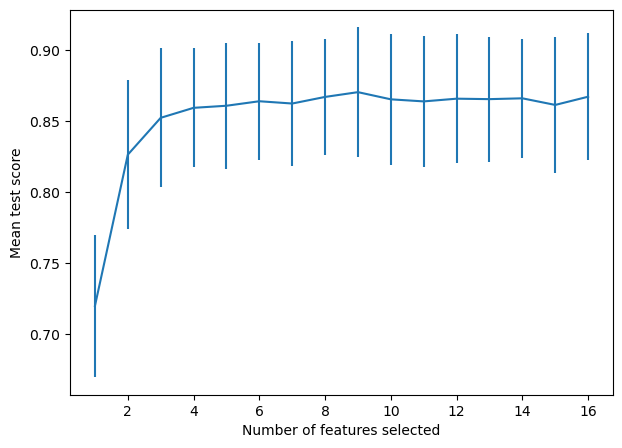

In [211]:
fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    refcv_rfe['featsel'].cv_results_["mean_test_score"],
    yerr=refcv_rfe['featsel'].cv_results_["std_test_score"],
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");
# plt.xlim(0,30)
# plt.ylim(0,0.3)

In [ ]:
#  refcv_rfe['featsel'].ranking_

In [ ]:
#  refcv_rfe['featsel'].ranking_.shape

In [ ]:
# np.argsort(refcv_rfe['featsel'].ranking_)

In [ ]:
# X_train_trans1.columns[ np.argsort(refcv_rfe['featsel'].ranking_) ]

## XG BOOST

In [62]:
import xgboost as xgb

In [213]:
model = xgb.XGBRegressor()
refcv_xg = Pipeline(
    steps=[
        ("featsel", RFECV(model, step=1, cv=5)),
        ("rf", xgb.XGBRegressor())
    ]
)

In [214]:
refcv_xg.fit(X_train_un,Y_train)

Pipeline(steps=[('featsel',
                 RFECV(cv=5,
                       estimator=XGBRegressor(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [215]:
Y_pred_xgb_with=refcv_xg.predict(X_test_un)

In [216]:
refcv_xg['featsel'].get_feature_names_out()

array(['categorical__standard_colour', 'categorical__standard_make',
       'categorical__standard_model', 'categorical__body_type',
       'numerical__mileage', 'numerical__vehicle_condition',
       'numerical__crossover_car_and_van', 'numerical__Age',
       'fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Petrol',
       'fuel_type_Petrol Hybrid', 'fuel_type_Petrol Plug-in Hybrid'],
      dtype=object)

In [217]:
len(refcv_xg['featsel'].get_feature_names_out())

13

In [218]:
X_train_trans_xgb=refcv_xg['featsel'].transform(X_train_un)
X_train_trans_xgb=pd.DataFrame(X_train_trans_xgb)
X_train_trans_xgb

0             1             2             3         4    5   \
0       18714.094439  11509.863923  16250.836345  22684.262397  0.624630  0.0   
1       16717.768972  11575.506430   6739.508096  10547.073058  0.261755  0.0   
2       16857.041080  14319.885978  14493.014078  10547.073058  0.259747  0.0   
3       15023.766544  36715.903099  28644.352288  22684.262397  0.052299  0.0   
4       13903.738450  20857.206134  14933.336638  10547.073058  0.000000  1.0   
...              ...           ...           ...           ...       ...  ...   
295117  19390.739698  13835.877220   8821.718007  10547.073058  0.327427  0.0   
295118  19390.739698  20857.206134  32907.484581  22684.262397  0.027663  0.0   
295119  20023.922187  11509.863923   7266.661479  10547.073058  0.075109  0.0   
295120  15023.766544  11575.506430  19959.806368  11525.011280  0.015618  0.0   
295121  13903.738450  25718.158835  11589.021412  10547.073058  0.118556  0.0   

         6         7    8    9    10   11   12  
0       0.0  0.090909  1.0  0.0  0.0  0.0  0.0  
1       0.0  0.090909  0.0  0.0  1.0  0.0  0.0  
2       0.0  0.030303  0.0  0.0  0.0  0.0  1.0  
3       0.0  0.015152  1.0  0.0  0.0  0.0  0.0  
4       0.0  0.000000  0.0  0.0  1.0  0.0  0.0  
...     ...       ...  ...  ...  ...  ...  ...  
295117  0.0  0.121212  1.0  0.0  0.0  0.0  0.0  
295118  0.0  0.000000  1.0  0.0  0.0  0.0  0.0  
295119  0.0  0.045455  0.0  0.0  1.0  0.0  0.0  
295120  0.0  0.000000  0.0  0.0  0.0  1.0  0.0  
295121  0.0  0.060606  1.0  0.0  0.0  0.0  0.0  

[295122 rows x 13 columns]

In [219]:
X_test_trans_xgb=refcv_xg['featsel'].transform(X_test_un)
X_test_trans_xgb=pd.DataFrame(X_test_trans_xgb)
X_test_trans_xgb

0              1              2             3         4   \
0      16857.041080   10908.649342   13111.019749  22684.262397  0.000000   
1      19390.739698  107196.502773  101753.999312  33637.905314  0.003912   
2      16717.768972    9124.950461   14657.584416  22684.262397  0.039519   
3      13903.738450   20370.625485   30644.301418  22684.262397  0.018534   
4      19390.739698   20857.206134   19350.466381  33637.905314  0.124547   
...             ...            ...            ...           ...       ...   
98369  20023.922187   10024.763477   12264.541440  22684.262397  0.087676   
98370  19390.739698   20857.206134   32907.484581  22684.262397  0.376675   
98371  13903.738450   20370.625485   19717.975806  26951.357440  0.746900   
98372  16857.041080   20857.206134   33967.904437  20067.191510  0.056946   
98373  16857.041080   13835.877220   27158.335470  22684.262397  0.219122   

        5    6         7    8    9    10   11   12  
0      1.0  0.0  0.000000  0.0  0.0  1.0  0.0  0.0  
1      0.0  0.0  0.000000  0.0  0.0  1.0  0.0  0.0  
2      0.0  0.0  0.000000  0.0  0.0  1.0  0.0  0.0  
3      0.0  0.0  0.000000  1.0  0.0  0.0  0.0  0.0  
4      0.0  0.0  0.045455  0.0  0.0  1.0  0.0  0.0  
...    ...  ...       ...  ...  ...  ...  ...  ...  
98369  0.0  0.0  0.015152  0.0  0.0  1.0  0.0  0.0  
98370  0.0  0.0  0.045455  1.0  0.0  0.0  0.0  0.0  
98371  0.0  0.0  0.090909  0.0  0.0  1.0  0.0  0.0  
98372  0.0  0.0  0.030303  1.0  0.0  0.0  0.0  0.0  
98373  0.0  0.0  0.045455  1.0  0.0  0.0  0.0  0.0  

[98374 rows x 13 columns]

In [220]:
# array(['categorical__standard_colour', 'categorical__standard_make',
#        'categorical__standard_model', 'categorical__body_type',
#        'numerical__mileage', 'numerical__vehicle_condition',
#        'numerical__crossover_car_and_van', 'numerical__Age',
#        'fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Petrol',
#        'fuel_type_Petrol Hybrid', 'fuel_type_Petrol Plug-in Hybrid'],
#       dtype=object)

In [221]:
feature_mapping = {
    0: 'categorical__standard_colour',
    1: 'categorical__standard_make',
    2: 'categorical__standard_model',
    3: 'categorical__body_type',
    4: 'numerical__mileage',
    5: 'numerical__vehicle_condition',
    6: 'numerical__crossover_car_and_van',
    7: 'numerical__Age',
    8: 'fuel_type_Diesel',
    9: 'fuel_type_Electric',
    10:'fuel_type_Petrol',
    11:'fuel_type_Petrol Hybrid', 
    12:'fuel_type_Petrol Plug-in Hybrid',
      
}


In [222]:
X_train_un.head()

categorical__standard_colour  categorical__standard_make  \
0                  18714.094439                11509.863923   
1                  16717.768972                11575.506430   
2                  16857.041080                14319.885978   
3                  15023.766544                36715.903099   
4                  13903.738450                20857.206134   

   categorical__standard_model  categorical__body_type  numerical__mileage  \
0                 16250.836345            22684.262397            0.624630   
1                  6739.508096            10547.073058            0.261755   
2                 14493.014078            10547.073058            0.259747   
3                 28644.352288            22684.262397            0.052299   
4                 14933.336638            10547.073058            0.000000   

   numerical__vehicle_condition  numerical__crossover_car_and_van  \
0                           0.0                               0.0   
1                           0.0                               0.0   
2                           0.0                               0.0   
3                           0.0                               0.0   
4                           1.0                               0.0   

   numerical__Age  fuel_type_Bi Fuel  fuel_type_Diesel  \
0        0.090909                0.0               1.0   
1        0.090909                0.0               0.0   
2        0.030303                0.0               0.0   
3        0.015152                0.0               1.0   
4        0.000000                0.0               0.0   

   fuel_type_Diesel Hybrid  fuel_type_Diesel Plug-in Hybrid  \
0                      0.0                              0.0   
1                      0.0                              0.0   
2                      0.0                              0.0   
3                      0.0                              0.0   
4                      0.0                              0.0   

   fuel_type_Electric  fuel_type_Petrol  fuel_type_Petrol Hybrid  \
0                 0.0               0.0                      0.0   
1                 0.0               1.0                      0.0   
2                 0.0               0.0                      0.0   
3                 0.0               0.0                      0.0   
4                 0.0               1.0                      0.0   

   fuel_type_Petrol Plug-in Hybrid  
0                              0.0  
1                              0.0  
2                              1.0  
3                              0.0  
4                              0.0

In [223]:
X_test_un.head()

categorical__standard_colour  categorical__standard_make  \
0                  16857.041080                10908.649342   
1                  19390.739698               107196.502773   
2                  16717.768972                 9124.950461   
3                  13903.738450                20370.625485   
4                  19390.739698                20857.206134   

   categorical__standard_model  categorical__body_type  numerical__mileage  \
0                 13111.019749            22684.262397            0.000000   
1                101753.999312            33637.905314            0.003912   
2                 14657.584416            22684.262397            0.039519   
3                 30644.301418            22684.262397            0.018534   
4                 19350.466381            33637.905314            0.124547   

   numerical__vehicle_condition  numerical__crossover_car_and_van  \
0                           1.0                               0.0   
1                           0.0                               0.0   
2                           0.0                               0.0   
3                           0.0                               0.0   
4                           0.0                               0.0   

   numerical__Age  fuel_type_Bi Fuel  fuel_type_Diesel  \
0        0.000000                0.0               0.0   
1        0.000000                0.0               0.0   
2        0.000000                0.0               0.0   
3        0.000000                0.0               1.0   
4        0.045455                0.0               0.0   

   fuel_type_Diesel Hybrid  fuel_type_Diesel Plug-in Hybrid  \
0                      0.0                              0.0   
1                      0.0                              0.0   
2                      0.0                              0.0   
3                      0.0                              0.0   
4                      0.0                              0.0   

   fuel_type_Electric  fuel_type_Petrol  fuel_type_Petrol Hybrid  \
0                 0.0               1.0                      0.0   
1                 0.0               1.0                      0.0   
2                 0.0               1.0                      0.0   
3                 0.0               0.0                      0.0   
4                 0.0               1.0                      0.0   

   fuel_type_Petrol Plug-in Hybrid  
0                              0.0  
1                              0.0  
2                              0.0  
3                              0.0  
4                              0.0

In [224]:
X_train_trans_xgb.columns = [feature_mapping[col] if col in feature_mapping else col for col in X_train_trans_xgb.columns]
X_test_trans_xgb.columns = [feature_mapping[col] if col in feature_mapping else col for col in X_test_trans_xgb.columns]

In [225]:
X_test_trans_xgb.columns

Index(['categorical__standard_colour', 'categorical__standard_make',
       'categorical__standard_model', 'categorical__body_type',
       'numerical__mileage', 'numerical__vehicle_condition',
       'numerical__crossover_car_and_van', 'numerical__Age',
       'fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Petrol',
       'fuel_type_Petrol Hybrid', 'fuel_type_Petrol Plug-in Hybrid'],
      dtype='object')

In [226]:
refcv_xg.score(X_test_un, Y_test), refcv_xg.score(X_train_un, Y_train)

(0.777510672295072, 0.9547310649520073)

In [227]:
mean_absolute_error(Y_test, refcv_xg.predict(X_test_un)), mean_absolute_error(Y_train, refcv_xg.predict(X_train_un))


(2448.6051503224367, 2172.4202746767446)

In [228]:
eval_results = cross_validate(
    refcv_xg, X_train_un,Y_train, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)
(
    (-eval_results['test_score'].mean(), eval_results['test_score'].std(),
    -eval_results['train_score'].mean(), eval_results['train_score'].std())
)

(2390.6249937650123, 35.99636508626867, 2161.580817742539, 27.441679025747256)

In [229]:
n_scores = len(refcv_xg['featsel'].cv_results_["mean_test_score"])
n_scores

16

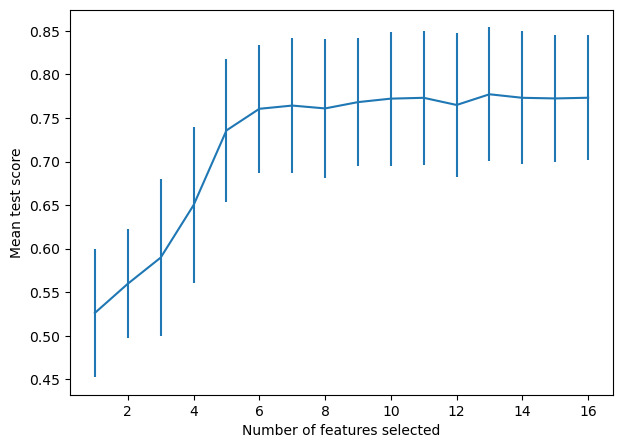

In [230]:
fig, ax = plt.subplots(figsize=(7,5))
ax.errorbar(
    range(1, n_scores+1),
    refcv_xg['featsel'].cv_results_["mean_test_score"],
    yerr=refcv_xg['featsel'].cv_results_["std_test_score"],
)
ax.set_xlabel("Number of features selected")
ax.set_ylabel("Mean test score");
# plt.xlim(0,30)
# plt.ylim(0,0.3)

In [231]:
 refcv_xg['featsel'].ranking_


array([1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 3, 1, 1, 1, 1])

In [232]:
refcv_xg['featsel'].ranking_.shape

(16,)

In [233]:
np.argsort(refcv_xg['featsel'].ranking_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 12, 13, 14, 15, 10, 11,  8],
      dtype=int64)

In [234]:
 X_train_un.columns[ np.argsort(refcv_xg['featsel'].ranking_) ]

Index(['categorical__standard_colour', 'categorical__standard_make',
       'categorical__standard_model', 'categorical__body_type',
       'numerical__mileage', 'numerical__vehicle_condition',
       'numerical__crossover_car_and_van', 'numerical__Age',
       'fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Petrol',
       'fuel_type_Petrol Hybrid', 'fuel_type_Petrol Plug-in Hybrid',
       'fuel_type_Diesel Hybrid', 'fuel_type_Diesel Plug-in Hybrid',
       'fuel_type_Bi Fuel'],
      dtype='object')

## PCA

In [61]:
from sklearn.decomposition import PCA
import plotly.express as px

In [236]:
df = pd.concat([X_train_un, Y_train], axis=1)
sf=pd.concat([z, a], axis=1)
sample_df = df.sample(frac=0.06, random_state=42)
sample_sf = sf.sample(frac=0.005, random_state=42)

In [237]:
fig = px.scatter_3d(sample_sf, y='Age', x='mileage', z='standard_make', color='price', opacity=0.8)

# Update marker properties
fig.update_traces(marker=dict(size=4,
                              line=dict(width=8, color='green')),
                  selector=dict(mode='markers'))
fig.show()

In [238]:
pca = PCA(n_components=8)

In [239]:
X_train_pca = pca.fit_transform(X_train_un)
X_test_pca = pca.transform(X_test_un)

In [240]:
X_train_pca.shape

(295122, 8)

In [241]:
lr = LinearRegression()

In [242]:
lr.fit(X_train_pca,Y_train)

LinearRegression()

In [243]:
y_pred_lr_pca=lr.predict(X_test_pca)
y_pred_lr_pca

array([ 23121.28127731, 126707.59633478,  16868.85229353, ...,
        10302.23315695,  37403.17954153,  25634.79420586])

In [244]:
# Calculate R^2 score on the test data
r2_test = r2_score(Y_test, y_pred_lr_pca)

# Calculate R^2 score on the training data
r2_train = lr.score(X_train_pca, Y_train)

print("R^2 Score on Test Data:", r2_test)
print("R^2 Score on Training Data:", r2_train)#

R^2 Score on Test Data: 0.5753807130060771
R^2 Score on Training Data: 0.5712221053847043


In [245]:
for i in range(1,16):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train_un)
    X_test_trf = pca.transform(X_test_un)
    
    lr = LinearRegression()
    
    lr.fit(X_train_trf,Y_train)
    
    y_pred = lr.predict(X_test_trf)
    
    print( r2_score(Y_test,y_pred))

0.5006670850451271
0.505465132412922
0.5236236908721408
0.5237821641786389
0.5297976962491363
0.5643910956695923
0.5643991115665095
0.575380713006078
0.5756214147921854
0.5762006661990867
0.5762444089663655
0.576277627631987
0.57644747338854
0.5764605485261827
0.5765316099675364


For Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor()

In [ ]:
for i in range(1,16):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train_un)
    X_test_trf = pca.transform(X_test_un)
    
    rf=RandomForestRegressor()
    
    rf.fit(X_train_trf,Y_train)
    
    y_pred = rf.predict(X_test_trf)
    
    print( r2_score(Y_test,y_pred))

In [246]:
import xgboost as xgb

In [247]:

params = {
    'objective': 'reg:squarederror',
    'n_estimators': 100,
    'max_depth': 3,  
    'learning_rate': 0.1,
    'random_state': 42 
}

In [248]:
xgb_reg = xgb.XGBRegressor(params)

In [249]:
for i in range(1,16):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train_un)
    X_test_trf = pca.transform(X_test_un)
    
    xgb_reg = xgb.XGBRegressor()
    
    xgb_reg.fit(X_train_trf,Y_train)
    
    y_pred = xgb_reg.predict(X_test_trf)
    
    print( r2_score(Y_test,y_pred))

0.4468306030112086
0.6245752415173748
0.7337631530497664
0.725521921129772
0.8239247444174205
0.7993555719165152
0.8109053883198456
0.825145110842659
0.7936561351736774
0.8146539743817356
0.8176240347108703
0.8037197192354769
0.8238347488474695
0.8207770930527227
0.8200653599439764


In [250]:
pca=PCA(n_components=8)
X_train_pca1 = pca.fit_transform(X_train_un)
X_test_pca1 = pca.transform(X_test_un)

In [251]:
pca.explained_variance_

array([3.67804910e+08, 4.94529695e+07, 3.55258754e+07, 4.90242082e+06,
       4.43732510e-01, 8.59979251e-02, 5.31374099e-02, 4.19155521e-02])

In [252]:
pca.components_.shape

(8, 16)

In [253]:
explained_variance_ratio=pca.explained_variance_ratio_


In [254]:
pca_components = pca.components_
pca_components

array([[ 1.10741430e-02,  6.69969689e-01,  7.21220612e-01,
         1.75666751e-01, -1.05175950e-06,  5.68341061e-07,
         1.09339770e-07, -5.06798451e-08, -6.76260301e-09,
         2.64341305e-06,  1.27569204e-07,  1.09970712e-08,
         2.88413503e-07, -3.24607491e-06, -1.65984140e-07,
         3.48428832e-07],
       [-1.88628190e-02,  6.73480120e-01, -4.90769733e-01,
        -5.52461574e-01,  3.95820903e-06, -4.78781828e-06,
        -3.99620450e-07,  1.54688170e-06, -2.47358850e-08,
        -5.39591942e-06, -2.98407602e-07, -1.44359004e-08,
        -1.14181833e-06,  8.63069550e-06, -8.70634783e-07,
        -8.84743583e-07],
       [-2.39305595e-04, -3.12310726e-01,  4.88561576e-01,
        -8.14720529e-01, -4.83214222e-06,  3.37076147e-06,
         4.25156936e-07, -1.61986340e-06, -3.01224360e-08,
        -1.00921802e-05,  1.03426994e-07, -2.16353534e-09,
         2.56404469e-06,  5.23710349e-06,  1.96672216e-06,
         2.53168842e-07],
       [-9.99760721e-01, -5.21090265e

In [255]:
pca_contrib_df = pd.DataFrame(pca_components.T * explained_variance_ratio, 
                              columns=[f"PC{i+1}" for i in range(len(explained_variance_ratio))],
                              index=X_train_un.columns)


In [256]:
print(pca_contrib_df.to_string(float_format='%.4f'))

                                     PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8
categorical__standard_colour      0.0089 -0.0020 -0.0000 -0.0107  0.0000  0.0000  0.0000  0.0000
categorical__standard_make        0.5384  0.0728 -0.0242 -0.0001  0.0000 -0.0000  0.0000 -0.0000
categorical__standard_model       0.5796 -0.0530  0.0379  0.0002  0.0000  0.0000 -0.0000  0.0000
categorical__body_type            0.1412 -0.0597 -0.0632  0.0001  0.0000 -0.0000  0.0000 -0.0000
numerical__mileage               -0.0000  0.0000 -0.0000  0.0000 -0.0000  0.0000  0.0000  0.0000
numerical__vehicle_condition      0.0000 -0.0000  0.0000 -0.0000  0.0000 -0.0000 -0.0000  0.0000
numerical__crossover_car_and_van  0.0000 -0.0000  0.0000  0.0000 -0.0000  0.0000 -0.0000 -0.0000
numerical__Age                   -0.0000  0.0000 -0.0000  0.0000 -0.0000  0.0000  0.0000  0.0000
fuel_type_Bi Fuel                -0.0000 -0.0000 -0.0000 -0.0000 -0.0000 -0.0000  0.0000  0.0000
fuel_type_Diesel              

In [257]:
np.cumsum(pca.explained_variance_ratio_)

array([0.80361813, 0.91166808, 0.98928868, 1.        , 1.        ,
       1.        , 1.        , 1.        ])

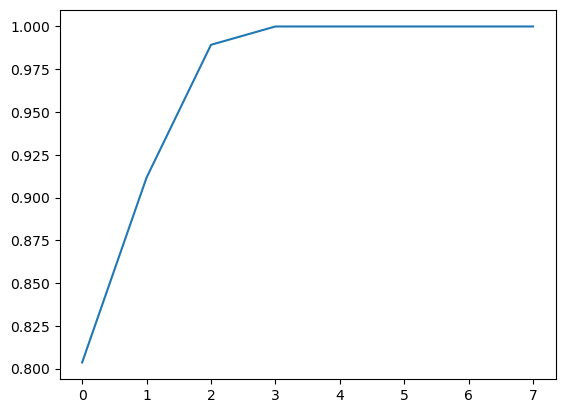

In [258]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

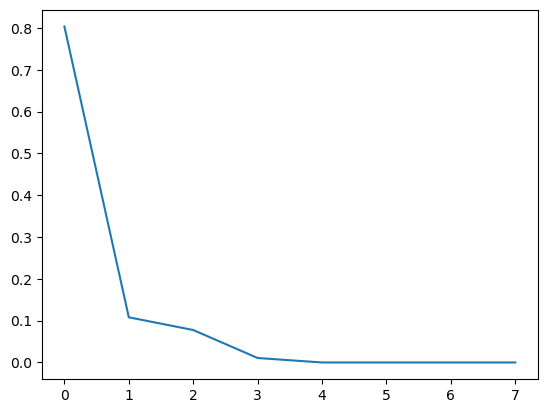

In [259]:
plt.plot(pca.explained_variance_ratio_)

In [264]:
explained_variance_ratio = pca.explained_variance_ratio_
pca_var_df = pd.DataFrame(explained_variance_ratio.reshape(1, -1), columns=[f"PC{i+1}" for i in range(len(explained_variance_ratio))])

# Add feature names as index
pca_var_df.index = data.columns

# Display the dataframe
print(pca_var_df)

ValueError: Length mismatch: Expected axis has 1 elements, new values have 10 elements

In [266]:
len(explained_variance_ratio)

8

In [ ]:
# consider taking 8 features because of the efficiency of 86.46 in all the 3 model type 
# take n_components=12


## MODElLING 

In [267]:
lr = LinearRegression()

In [268]:
lr.fit(X_train_un,Y_train)

LinearRegression()

In [269]:
Y_pred_lr=lr.predict(X_test_un)
Y_pred_lr_df=pd.DataFrame(Y_pred_lr)

In [270]:
print("Shape of X_test:", X_test_un.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_test: (98374, 16)
Shape of Y_test: (98374,)


In [271]:
cv_scores_lr = cross_val_score(lr, X_train_un, Y_train, cv=5)

print("Cross-validation scores:", cv_scores_lr)
print("Mean CV score:", cv_scores_lr.mean())

Cross-validation scores: [0.52698896 0.67559068 0.49871922 0.60609607 0.60932459]
Mean CV score: 0.5833439047985894


In [272]:
mse_lr = mean_squared_error(Y_test, Y_pred_lr)
r2_lr = r2_score(Y_test, Y_pred_lr)
print("Linear Regression:")
print("Mean Squared Error:", mse_lr)
print("R-squared Score:", r2_lr)

Linear Regression:
Mean Squared Error: 278350829.6575599
R-squared Score: 0.5765316099675363


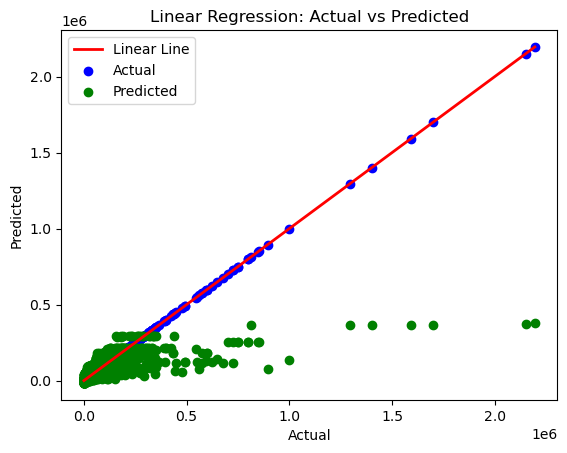

In [273]:
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2, label='Linear Line')

# Plot the scatter plot of actual values
plt.scatter(Y_test, Y_test, color='blue', label='Actual')

# Plot the scatter plot of predicted values
plt.scatter(Y_test, Y_pred_lr, color='green', label='Predicted')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()



In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import ParameterGrid
# list(ParameterGrid(parameters))

In [275]:
steps = [
    ('selector', SelectKBest(score_func=f_regression, k=13)),  
    ('pca', PCA(n_components=8)),  
    ('regressor', LinearRegression()) 
]

In [276]:
pipeline = Pipeline(steps)
pipeline.fit(X_train_un, Y_train)
Y_pred_lrr=pipeline.predict(X_test_un)

In [277]:
cv_scores_lr_pca = cross_val_score(pipeline, X_train_un, Y_train, cv=5)

print("Cross-validation scores:", cv_scores_lr_pca)
print("Mean CV score:", cv_scores_lr_pca.mean())

Cross-validation scores: [0.52552811 0.67367299 0.49792937 0.60431595 0.60777609]
Mean CV score: 0.5818445034065585


In [278]:
mse_lr = mean_squared_error(Y_test, Y_pred_lrr)
r2_lr = r2_score(Y_test, Y_pred_lrr)
print("Linear Regression:")
print("Mean Squared Error:", mse_lr)
print("R-squared Score:", r2_lr)

Linear Regression:
Mean Squared Error: 279204917.5319588
R-squared Score: 0.5752322453579071


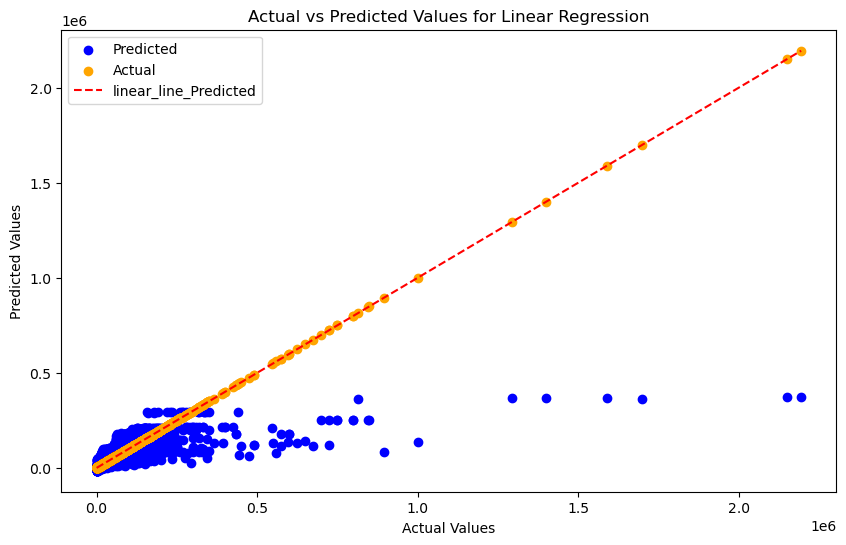

In [279]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_lrr, color='blue', label='Predicted')
plt.scatter(Y_test, Y_test, color='orange', label='Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='linear_line_Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Linear Regression')
plt.legend()
plt.show()

In [280]:
parameters = {
    'selector__k': [5, 7, 8,10,12],  
    'pca__n_components': [3, 5,7,8],  
    'regressor__fit_intercept': [True, False]  
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_un, Y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Negative Mean Squared Error:", best_score)

Best Parameters: {'pca__n_components': 8, 'regressor__fit_intercept': True, 'selector__k': 8}
Best Negative Mean Squared Error: 251538426.56921196


In [ ]:
# WITH POLYNOMIAL

In [281]:
poly = PolynomialFeatures(degree=3)  
X_poly_train = poly.fit_transform(X_train_un)
X_poly_test = poly.transform(X_test_un)

In [282]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, Y_train)
y_pred_poly = poly_model.predict(X_poly_test)

In [283]:
# Calculate evaluation metrics
mse_poly = mean_squared_error(Y_test, y_pred_poly)
r2_poly = r2_score(Y_test, y_pred_poly)
print("\nPolynomial Regression:")
print("Mean Squared Error:", mse_poly)
print("R-squared Score with Polynomial:", r2_poly)
print("R-squared Score :", r2_lr)


Polynomial Regression:
Mean Squared Error: 161562320.23453686
R-squared Score with Polynomial: 0.754207538293319
R-squared Score : 0.5752322453579071


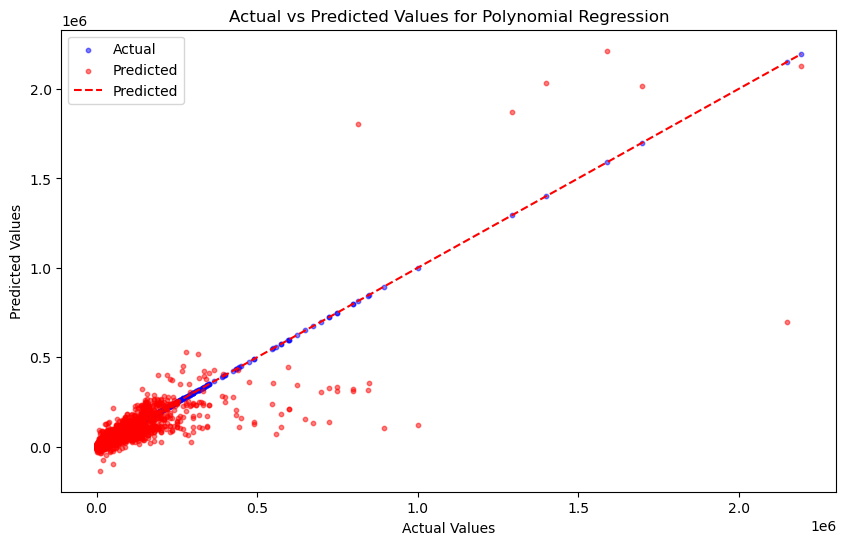

In [284]:
plt.figure(figsize=(10, 6))

# Plot actual values with blue markers
plt.scatter(Y_test, Y_test, color='blue', label='Actual', alpha=0.5, s=10)  # s=10 sets marker size to 10

# Plot predicted values with red markers
plt.scatter(Y_test, y_pred_poly, color='red', label='Predicted', alpha=0.5, s=10)  # s=10 sets marker size to 10

# Plot the line y = x for reference
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Predicted')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Polynomial Regression')
plt.legend()
plt.show()


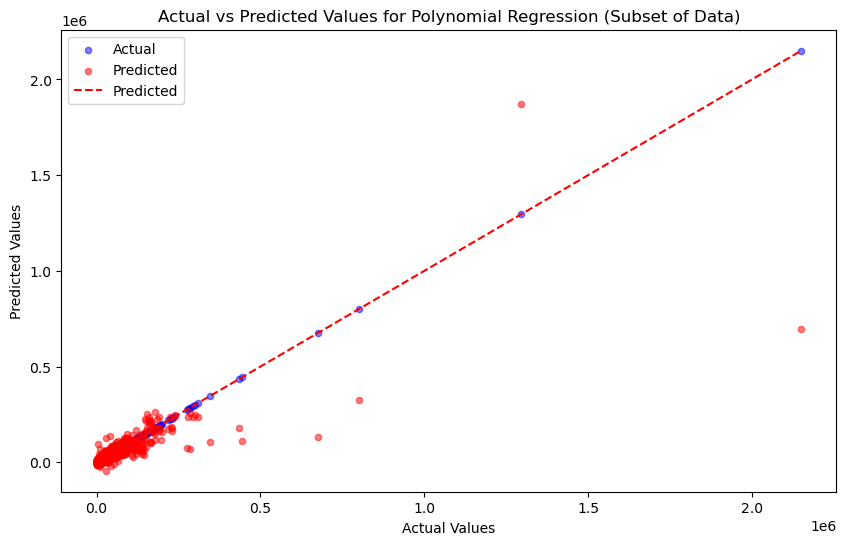

In [285]:
Y_test_array = Y_test.values

# Randomly select 20% of the data points
subset_size = int(0.15 * len(Y_test_array))
indices = np.random.choice(len(Y_test_array), subset_size, replace=False)

# Create subset of data
Y_test_subset = Y_test_array[indices]
y_pred_poly_subset = y_pred_poly[indices]

# Plotting
plt.figure(figsize=(10, 6))

# Plot actual values with blue markers
plt.scatter(Y_test_subset, Y_test_subset, color='blue', label='Actual', alpha=0.5, s=20)

# Plot predicted values with red markers
plt.scatter(Y_test_subset, y_pred_poly_subset, color='red', label='Predicted', alpha=0.5, s=20)

# Plot the line y = x for reference
plt.plot([Y_test_subset.min(), Y_test_subset.max()], [Y_test_subset.min(), Y_test_subset.max()], color='red', linestyle='--', label='Predicted')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Polynomial Regression (Subset of Data)')
plt.legend()
plt.show()
# plt.xlim(0,0.1)
# plt.ylim(0,0.3)

In [286]:
Y_test

78580      23600
205215    129890
70471      15990
352335     27898
12099      19795
           ...  
383932     14700
120140     28499
313658     13555
330856     33980
268975     21595
Name: price, Length: 98374, dtype: int64

# RANDOM FOREST

In [287]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train_un, Y_train)

y_pred = rf_model.predict(X_test_un)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 84778275.71042286
R^2 Score: 0.8710227665964277


In [288]:
y_pred_rf = rf_model.predict(X_test_un)

In [289]:
# Cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train_un, Y_train, cv=5)
print("Cross-Validation Scores:", cv_scores_rf)
print("Mean CV Score:", np.mean(cv_scores_rf))



Cross-Validation Scores: [0.80310011 0.83697626 0.86303738 0.92204563 0.90224834]
Mean CV Score: 0.8654815417060087


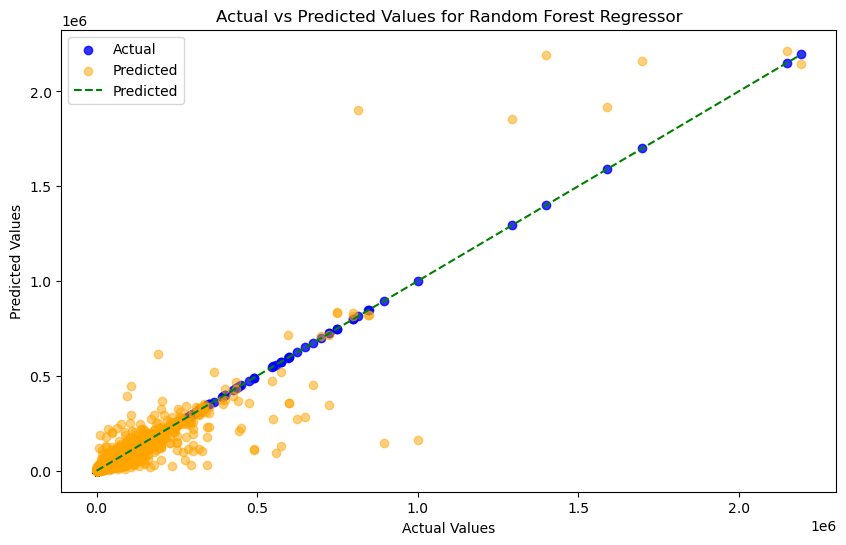

In [290]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_test, color='blue', label='Actual', alpha=0.8)
plt.scatter(Y_test, y_pred_rf, color='orange', label='Predicted', alpha=0.5)

plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='green', linestyle='--', label='Predicted')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regressor')
plt.legend()
plt.show()

In [291]:
# parameters = {'n_estimators': [100,150],          # Number of trees in the forest
#               'max_depth': [None, 2, 3, 4,5],         # Maximum depth of the tree
#               'min_samples_split': [2, 5, 10],         
#               'min_samples_leaf': [1, 2, 4]}           

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(rf_model, parameters, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train_un, Y_train)

# # Get the best parameters and the best score
# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Negative Mean Squared Error:", best_score)

In [292]:
# Feature Importance
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = np.array(X_train_un.columns)[sorted_idx]



In [293]:
feature_importance

array([1.51917785e-02, 4.90091997e-02, 6.97895793e-01, 1.01753455e-02,
       1.01770145e-01, 8.85845617e-04, 5.90003290e-04, 1.10817762e-01,
       2.77586822e-06, 1.56446236e-03, 4.13689457e-05, 1.24030413e-05,
       3.71879040e-04, 2.95957539e-03, 6.09516217e-03, 2.61650092e-03])

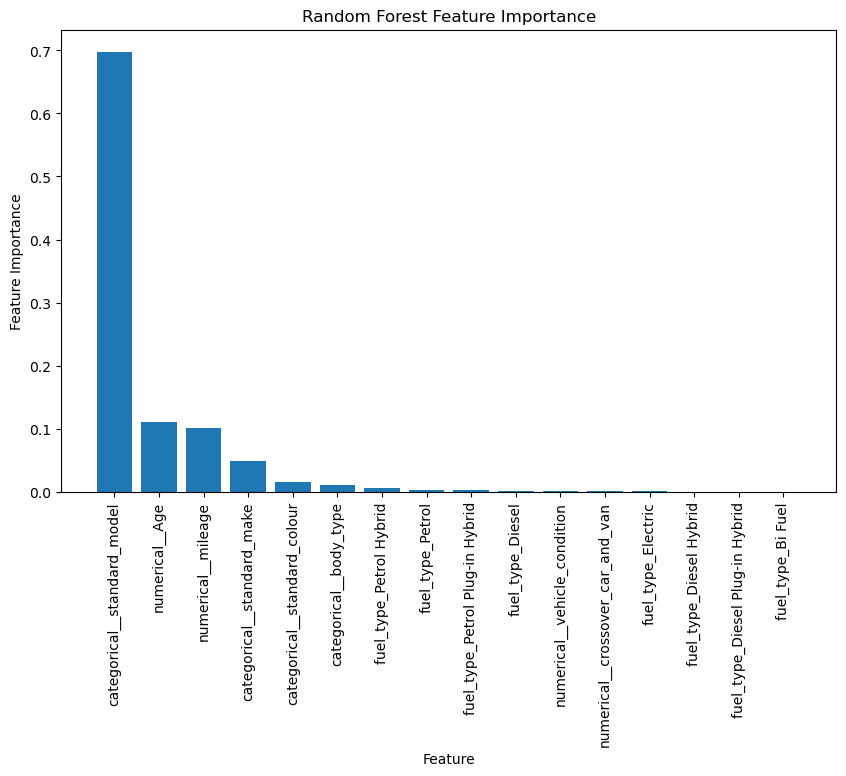

In [294]:
# Plotting Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_un.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(X_train_un.shape[1]), sorted_features, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

# Random Forest with PCA

In [295]:
steps = [
   # ('selector', SelectKBest(score_func=f_regression, k=13)),  
    ('pca', PCA(n_components=8)),  
    ('regressor', RandomForestRegressor()) 
]

In [296]:
pipeline_rf_pc = Pipeline(steps)
pipeline_rf_pc.fit(X_train_un, Y_train)
Y_pred_rf_pc=pipeline_rf_pc.predict(X_test_un)

In [297]:
cv_scores_rf_pc = cross_val_score(pipeline_rf_pc, X_train_un, Y_train, cv=5)


In [298]:
print("Cross-validation scores:", cv_scores_rf_pc)
print("Mean CV score:", cv_scores_rf_pc.mean())

Cross-validation scores: [0.85431242 0.77678818 0.70789381 0.8867054  0.865156  ]
Mean CV score: 0.8181711622194777


In [299]:

mse_rf_pc = mean_squared_error(Y_test, Y_pred_rf_pc)
r2_rf_pc = r2_score(Y_test, Y_pred_rf_pc)
print("RAndom Forest Regressor:")
print("Mean Squared Error:", mse_rf_pc)
print("R-squared Score with pca:", r2_rf_pc)
print("R-squared Score:", r2)



RAndom Forest Regressor:
Mean Squared Error: 103170889.47940257
R-squared Score with pca: 0.8430412062367163
R-squared Score: 0.8710227665964277


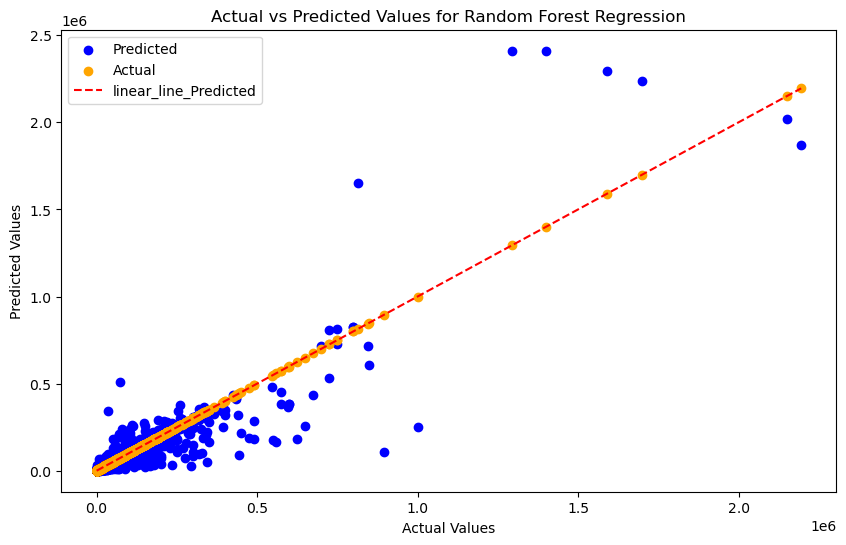

In [300]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_rf_pc, color='blue', label='Predicted')
plt.scatter(Y_test, Y_test, color='orange', label='Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='linear_line_Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regression')
plt.legend()
plt.show()



In [ ]:
# parameters = {
#     'selector__k': [5, 7, 8,10,12],  
#     'pca__n_components': [3, 5,7,8],  
#     'regressor__fit_intercept': [True, False]  
# }



In [ ]:

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train_un, Y_train)


In [ ]:

# # Get the best parameters and the best score
# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Negative Mean Squared Error:", best_score)

# XG BOOST

In [301]:
params = {
    'objective': 'reg:squarederror',  
    'n_estimators': 100,
    'max_depth': 5,  
    'learning_rate': 0.1,  
    'random_state': 42 
}

In [302]:
xgb_model = xgb.XGBRegressor(**params)

In [303]:
xgb_model.fit(X_train_un, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [304]:
y_pred_xgbb = xgb_model.predict(X_test_un)

In [305]:
cv_scores_xg = cross_val_score(xgb_model, X_train_un, Y_train, cv=5)

In [306]:
print("Cross-validation scores:", cv_scores_xg)
print("Mean CV score:", cv_scores_xg.mean())

Cross-validation scores: [0.81635514 0.74255627 0.70799283 0.86272794 0.68976714]
Mean CV score: 0.7638798629471117


In [307]:
mse = mean_squared_error(Y_test, y_pred_xgbb)
r2_xg = r2_score(Y_test, y_pred_xgbb)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2_xg)

Mean Squared Error: 147432172.5968832
R^2 Score: 0.7757044056761093


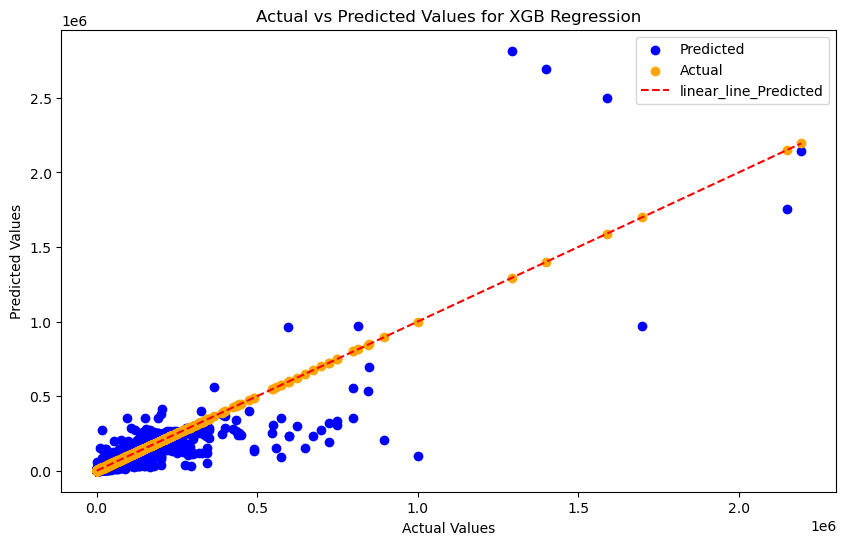

In [308]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred_xgbb, color='blue', label='Predicted')
plt.scatter(Y_test, Y_test, color='orange', label='Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='linear_line_Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for XGB Regression')
plt.legend()
plt.show()



# with PCA

In [309]:
steps = [
   # ('selector', SelectKBest(score_func=f_regression, k=13)),  
    ('pca', PCA(n_components=8)),  
    ('regressor', xgb.XGBRegressor(**params)) 
]

In [310]:
pipeline_xg_pc = Pipeline(steps)
pipeline_xg_pc.fit(X_train_un, Y_train)
Y_pred_xg_pc=pipeline_xg_pc.predict(X_test_un)

In [311]:
cv_scores_xg_pc = cross_val_score(pipeline_xg_pc, X_train_un, Y_train, cv=5)

print("Cross-validation scores:", cv_scores_xg_pc)
print("Mean CV score:", cv_scores_xg_pc.mean())

Cross-validation scores: [0.70228636 0.77879399 0.60959018 0.86383134 0.77140609]
Mean CV score: 0.7451815914699523


In [312]:

mse_xg_pc = mean_squared_error(Y_test, Y_pred_xg_pc)
r2_xg_pc = r2_score(Y_test, Y_pred_xg_pc)
print("XGB Regression:")
print("Mean Squared Error:", mse_xg_pc)
print("R-squared Score with pca:", r2_xg_pc)
print("R-squared Score:",r2_xg)

XGB Regression:
Mean Squared Error: 115325688.09905212
R-squared Score with pca: 0.8245495315075118
R-squared Score: 0.7757044056761093


In [313]:
param_grid = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'max_depth': [3],
    'min_child_weight': [1, 3],
    #'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [314]:
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)


In [315]:
grid_search_xgb.fit(X_train_un, Y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.1, 0.01], 'max_depth': [3],
                         'min_child_weight': [1, 3], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]})

In [316]:
best_model_xgb = grid_search_xgb.best_estimator_
best_params_xgb = grid_search_xgb.best_params_

print("Best Parameters:", best_params_xgb)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}


In [317]:
parameters = {
    'learning_rate': [0.1],
    'n_estimators': [200],
    'max_depth': [3],
    'min_child_weight': [1],
    'subsample': [1.0],
    'colsample_bytree': [1.0]
}

In [318]:
xgb_model_best = xgb.XGBRegressor(parameter=parameters)

In [319]:
xgb_model_best.fit(X_train_un, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshol...e, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None,
             parameter={'colsample_bytree': [1.0], 'learning_rate': [0.1],
                        'max_depth': [3], 'min_child_weight': [1],
                        'n_estimators': [200], 'subsample': [1.0]}, ...)

In [320]:
y_pred_xgbb_best = xgb_model_best.predict(X_test_un)

In [321]:
mse_best = mean_squared_error(Y_test, y_pred_xgbb_best)
r2_xg_best = r2_score(Y_test, y_pred_xgbb_best)
print("Mean Squared Error:", mse_best)
print("R^2 Score:", r2_xg_best)

Mean Squared Error: 146477360.30912086
R^2 Score: 0.7771570071387288


In [322]:
# Cross-validation
cv_scores = cross_val_score(xgb_model, X_train_un, Y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.81635514 0.74255627 0.70799283 0.86272794 0.68976714]
Mean CV Score: 0.7638798629471117


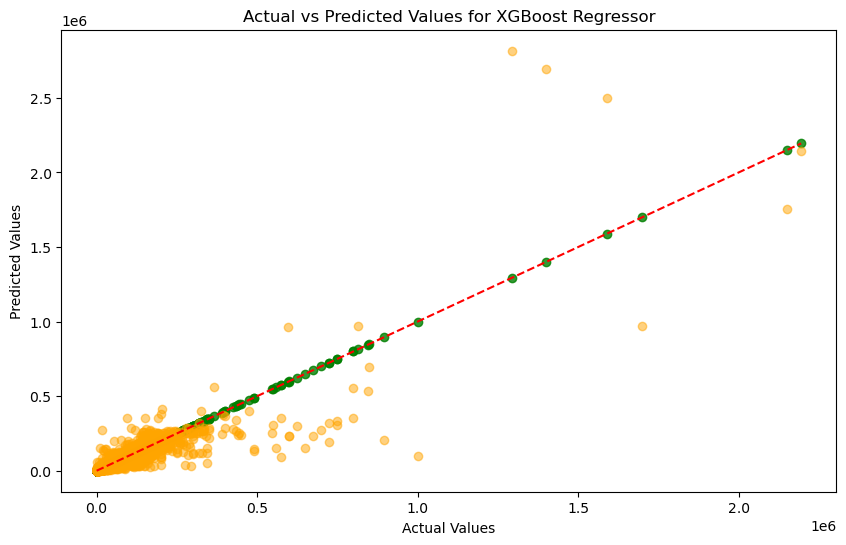

In [323]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_test, color='green', label='Actual', alpha=0.8)
plt.scatter(Y_test, y_pred_xgbb, color='orange', label='Predicted', alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for XGBoost Regressor')
plt.show()

# ENSEMBLING VOTER

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

In [325]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
lr_model = LinearRegression()

voter_model_en = VotingRegressor([('rf', rf_model), ('gb', gb_model), ('lr', lr_model)])


In [326]:
voter_model_en.fit(X_train_un, Y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                            ('gb', GradientBoostingRegressor(random_state=42)),
                            ('lr', LinearRegression())])

In [327]:
y_pred_en = voter_model_en.predict(X_test_un)

In [328]:
# Evaluate the model
mse = mean_squared_error(Y_test, y_pred_en)
r2_en = r2_score(Y_test, y_pred_en)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2_en)


Mean Squared Error: 89010185.53903234
R^2 Score: 0.8645845603798753


In [332]:
# Cross-validation
cv_scores_en = cross_val_score(voter_model_en, X_train_un, Y_train, cv=5)
print("Cross-Validation Scores:", cv_scores_en)
print("Mean CV Score:", np.mean(cv_scores_en))

Cross-Validation Scores: [0.76737783 0.83311104 0.77003128 0.87696968 0.86029515]
Mean CV Score: 0.8215569977167881


In [335]:

model_results_list = []
for estimator_name, estimator in voter_model_en.estimators:
    eval_results = cross_validate(
        estimator, X_train_un, Y_train, cv=5,
        scoring='neg_mean_absolute_error',
        return_train_score=True
    ) 
    model_results_list.append(
        (-eval_results['test_score'].mean(), eval_results['test_score'].std(),
         -eval_results['train_score'].mean(), eval_results['train_score'].std())
    )

In [343]:

eval_results_en = cross_val_score(voter_model_en, X_train_un, Y_train, cv=5, scoring='neg_mean_absolute_error')

mean_cv_score_en = -eval_results_en.mean()  
std_cv_score_en = eval_results_en.std()

print("Cross-Validation Scores:", eval_results_en)
print("Mean CV Score:", mean_cv_score_en)
print("Standard Deviation of CV Scores:", std_cv_score_en)


Cross-Validation Scores: [-2963.35588658 -2925.38613419 -3000.48054209 -2931.25079171
 -2913.35269868]
Mean CV Score: 2946.7652106503137
Standard Deviation of CV Scores: 31.54281350924417


In [344]:
model_results = pd.DataFrame(
    model_results_list,
    columns=['test_mae_mean', 'test_mae_std', 'train_mae_mean', 'train_mae_std'],
    index=['gbr', 'rfr', 'lr']
)

In [345]:
model_results

test_mae_mean  test_mae_std  train_mae_mean  train_mae_std
gbr    2068.036931     26.022127      863.499086       3.124159
rfr    3191.977692     27.108624     3136.139960      15.209839
lr     4850.258104     32.811376     4850.168084      47.000463

In [347]:
for est_name, est in voter_model_en.estimators:
    est.fit(X_train_un, Y_train)


In [348]:
Xs=pd.concat([X_train_un,X_test_un],axis=0)


In [350]:
xt = Xs.head(35)
yt = a.head(35)
pred_gbr = gb_model.predict(xt)
pred_rfr = rf_model.predict(xt)
pred_lr = lr_model.predict(xt)
pred_vot =voter_model_en.predict(xt)

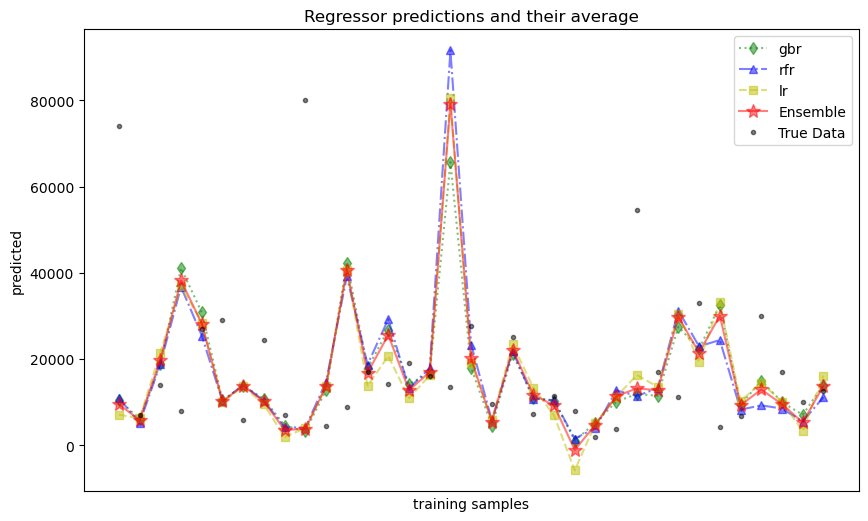

In [351]:

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(pred_gbr, "gd:", alpha=0.5, label="gbr")
ax.plot(pred_rfr, "b^-.", alpha=0.5, label="rfr")
ax.plot(pred_lr, "ys--", alpha=0.5, label="lr")
ax.plot(pred_vot, "r*-", alpha=0.5, ms=10, label="Ensemble")
ax.plot(yt, "ko", alpha=0.5, ms=3, label="True Data")

ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
ax.set_ylabel("predicted")
ax.set_xlabel("training samples")
ax.legend(loc="best")
ax.set_title("Regressor predictions and their average");

# with PCA

In [352]:
pca = PCA(n_components=0.98)  # Choose number of components to retain 90% of variance
X_train_pca = pca.fit_transform(X_train_un)
X_test_pca = pca.transform(X_test_un)

In [353]:
# Define models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
lr_model = LinearRegression()

In [354]:
# Ensemble model
voter_model_en_pc = VotingRegressor([('rf', rf_model), ('gb', gb_model), ('lr', lr_model)])

# Fit ensemble model
voter_model_en_pc.fit(X_train_pca, Y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                            ('gb', GradientBoostingRegressor(random_state=42)),
                            ('lr', LinearRegression())])

In [356]:
y_pred_en_pc = voter_model_en_pc.predict(X_test_pca)

In [357]:
# Evaluate the model
mse_en_pc = mean_squared_error(Y_test, y_pred_en_pc)
r2_en_pc = r2_score(Y_test, y_pred_en_pc)
print("Mean Squared Error:", mse_en_pc)
print("R^2 Score with pc:", r2_en_pc)
print("R^2 Score:", r2_en)


Mean Squared Error: 152591304.38109568
R^2 Score with pc: 0.7678555724848681
R^2 Score: 0.8645845603798753


In [359]:
cv_scores_en_pc = cross_val_score(voter_model_en_pc, X_train_pca, Y_train, cv=5)
print("Cross-Validation Scores:", cv_scores_en_pc)
print("Mean CV Score:", np.mean(cv_scores_en_pc))

Cross-Validation Scores: [0.65492403 0.64882458 0.5677292  0.75468242 0.73101554]
Mean CV Score: 0.6714351549515465


In [360]:
num_components_selected = pca.n_components_

In [361]:
explained_variance_ratio = pca.explained_variance_ratio_

print("Number of components selected:", num_components_selected)
print("Explained variance ratio of selected components:", explained_variance_ratio)

Number of components selected: 3
Explained variance ratio of selected components: [0.80361813 0.10804995 0.0776206 ]


In [362]:
for est_name, est in voter_model_en_pc.estimators:
    est.fit(X_train_pca, Y_train)

In [363]:
X_train_pca=pd.DataFrame(X_train_pca)
X_test_pca=pd.DataFrame(X_test_pca)

In [364]:
Xs=pd.concat([X_train_pca,X_test_pca],axis=0)

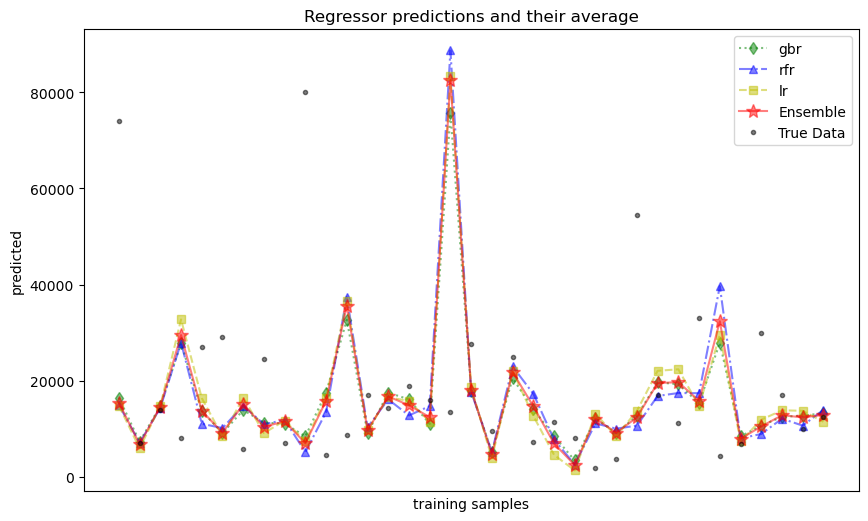

In [366]:
xt = Xs.head(35)
yt = a.head(35)
pred_gbr = gb_model.predict(xt)
pred_rfr = rf_model.predict(xt)
pred_lr = lr_model.predict(xt)
pred_vot =voter_model_en_pc.predict(xt)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(pred_gbr, "gd:", alpha=0.5, label="gbr")
ax.plot(pred_rfr, "b^-.", alpha=0.5, label="rfr")
ax.plot(pred_lr, "ys--", alpha=0.5, label="lr")
ax.plot(pred_vot, "r*-", alpha=0.5, ms=10, label="Ensemble")
ax.plot(yt, "ko", alpha=0.5, ms=3, label="True Data")

ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
ax.set_ylabel("predicted")
ax.set_xlabel("training samples")
ax.legend(loc="best")
ax.set_title("Regressor predictions and their average")

plt.show()

In [367]:
models_data = {
    'Model': ['LinearRegression', 'RandomForestRegressor', 'XGBRegressor',"voter_model"],
    'R2 Score without PCA': [0.585, 0.871, 0.775,0.864],
    'R2 Score with PCA': [0.575, 0.849, 0.824,0.767],
    'Cross-Validation Score without PCA': [ cv_scores_lr.mean(),np.mean(cv_scores_rf),np.mean(cv_scores_xg),np.mean(cv_scores_en)],
    'Cross-Validation Score with PCA': [ cv_scores_lr_pca.mean(), np.mean(cv_scores_rf_pc),np.mean(cv_scores_xg_pc) , np.mean(cv_scores_en_pc)]
}

# Convert data to DataFrame
df = pd.DataFrame(models_data)


Text(0.5, 0, 'Models')

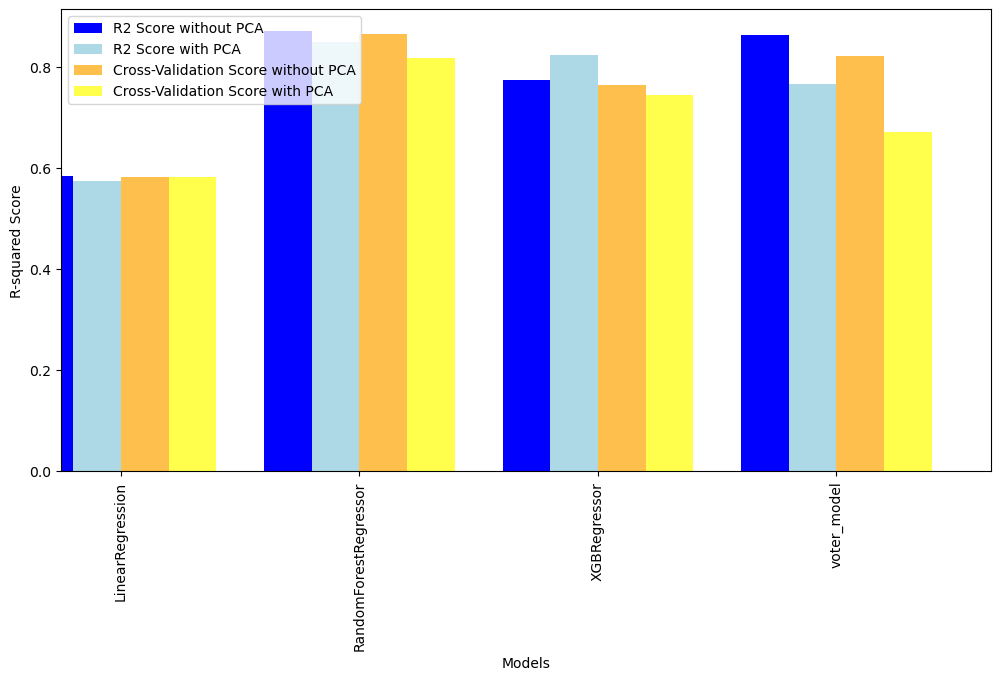

In [368]:

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plot R2 scores
df[['R2 Score without PCA', 'R2 Score with PCA']].plot(kind='bar', ax=ax, width=0.4, position=1, color=['blue', 'lightblue'], align='center')
ax.set_ylabel('R-squared Score')

# Plot cross-validation scores
df[['Cross-Validation Score without PCA', 'Cross-Validation Score with PCA']].plot(kind='bar', ax=ax, width=0.4, position=0, color=['orange', 'yellow'], align='center', alpha=0.7)
ax.set_xticklabels(df['Model'])
ax.set_xlabel('Models')

In [ ]:
# selecting Ensembling voter as effective model because of its providing higher efficiency without pca and can be 
#explained deeply if features are obtained

# PART 5

# SHAP

In [52]:
!pip install --upgrade -q shap
import shap
shap.initjs()

In [57]:
import xgboost as xgb

In [103]:
X_train_samp=X_train_un.sample(frac=0.05,random_state=42)
X_test_samp=X_test_un.sample(frac=0.05,random_state=42)

In [104]:
Y_train_samp=Y_train.sample(frac=0.05,random_state=42)
Y_test_samp=Y_test.sample(frac=0.05,random_state=42)

In [105]:
X_test_samp

categorical__standard_colour  categorical__standard_make  \
88418                  15023.766544                11509.863923   
69514                  16717.768972                10024.763477   
71095                  20023.922187                20370.625485   
88046                  20023.922187               164578.435127   
3337                   16717.768972                10908.649342   
...                             ...                         ...   
21069                  20023.922187                11509.863923   
89853                  16717.768972                36715.903099   
34140                  15023.766544                13257.533081   
21124                  16857.041080                10024.763477   
89832                  18714.094439                36715.903099   

       categorical__standard_model  categorical__body_type  \
88418                 12869.958641            22684.262397   
69514                 12264.541440            22684.262397   
71095                 63789.672886            33637.905314   
88046                145911.214095            33637.905314   
3337                  14018.280827            22684.262397   
...                            ...                     ...   
21069                  7022.942748            22684.262397   
89853                 25212.069379            22684.262397   
34140                 12184.057692            20067.191510   
21124                  8538.165187            11525.011280   
89832                 16465.539138            22684.262397   

       numerical__mileage  numerical__vehicle_condition  \
88418            0.245015                           0.0   
69514            0.316377                           0.0   
71095            0.000079                           1.0   
88046            0.072983                           0.0   
3337             0.237901                           0.0   
...                   ...                           ...   
21069            0.920655                           0.0   
89853            0.324052                           0.0   
34140            0.071955                           0.0   
21124            0.150170                           0.0   
89832            0.727141                           0.0   

       numerical__crossover_car_and_van  numerical__Age  fuel_type_Bi Fuel  \
88418                               0.0        0.045455                0.0   
69514                               0.0        0.045455                0.0   
71095                               0.0        0.000000                0.0   
88046                               0.0        0.045455                0.0   
3337                                0.0        0.060606                0.0   
...                                 ...             ...                ...   
21069                               0.0        0.106061                0.0   
89853                               0.0        0.075758                0.0   
34140                               0.0        0.015152                0.0   
21124                               0.0        0.030303                0.0   
89832                               1.0        0.712121                0.0   

       fuel_type_Diesel  fuel_type_Diesel Hybrid  \
88418               1.0                      0.0   
69514               0.0                      0.0   
71095               0.0                      0.0   
88046               0.0                      0.0   
3337                1.0                      0.0   
...                 ...                      ...   
21069               1.0                      0.0   
89853               1.0                      0.0   
34140               0.0                      0.0   
21124               1.0                      0.0   
89832               1.0                      0.0   

       fuel_type_Diesel Plug-in Hybrid  fuel_type_Electric  fuel_type_Petrol  \
88418                              0.0                 0.0               0.0   
69514                     

In [106]:
xg_reg_shap = xgb.XGBRegressor()
xg_reg_shap.fit(X_train_samp, Y_train_samp)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [76]:
eval_results_shap = cross_validate(
    xg_reg_shap,X_train_samp, Y_train_samp, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)
print(-eval_results_shap['test_score'].mean(), eval_results_shap['test_score'].std())
print(-eval_results_shap['train_score'].mean(), eval_results_shap['train_score'].std())

2700.610414649546 89.25814749899814
1792.8919661432694 25.5050223258118


In [107]:
explainer = shap.TreeExplainer(xg_reg_shap, X_train_samp)
explainer

In [109]:
shap_values = explainer(X_test_samp)

 99%|===================| 4891/4919 [00:24<00:00]        

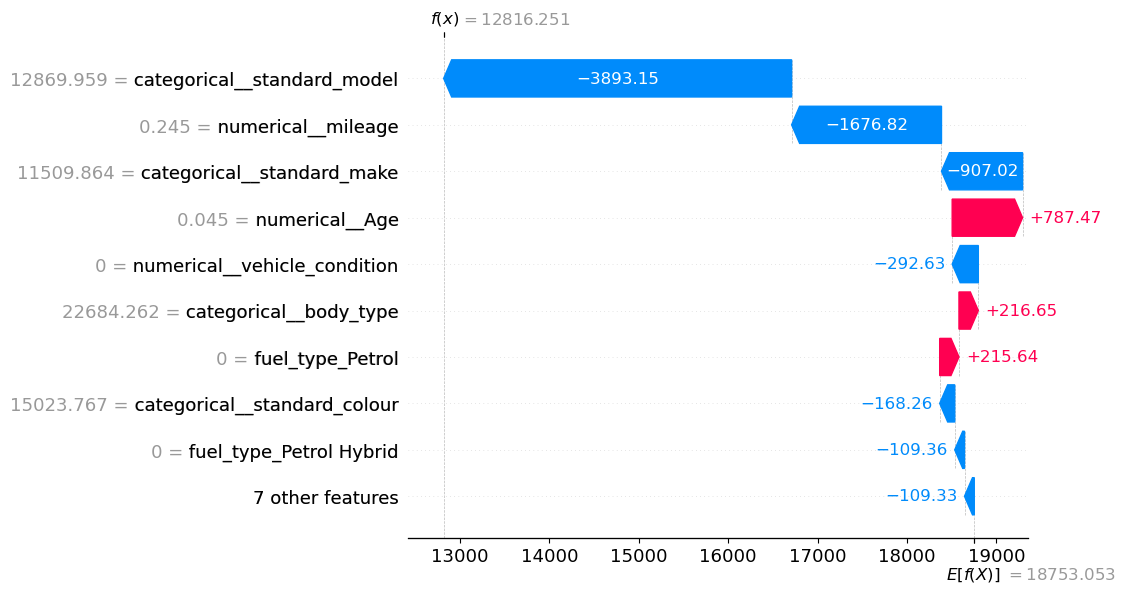

In [110]:
shap.plots.waterfall(shap_values[0])

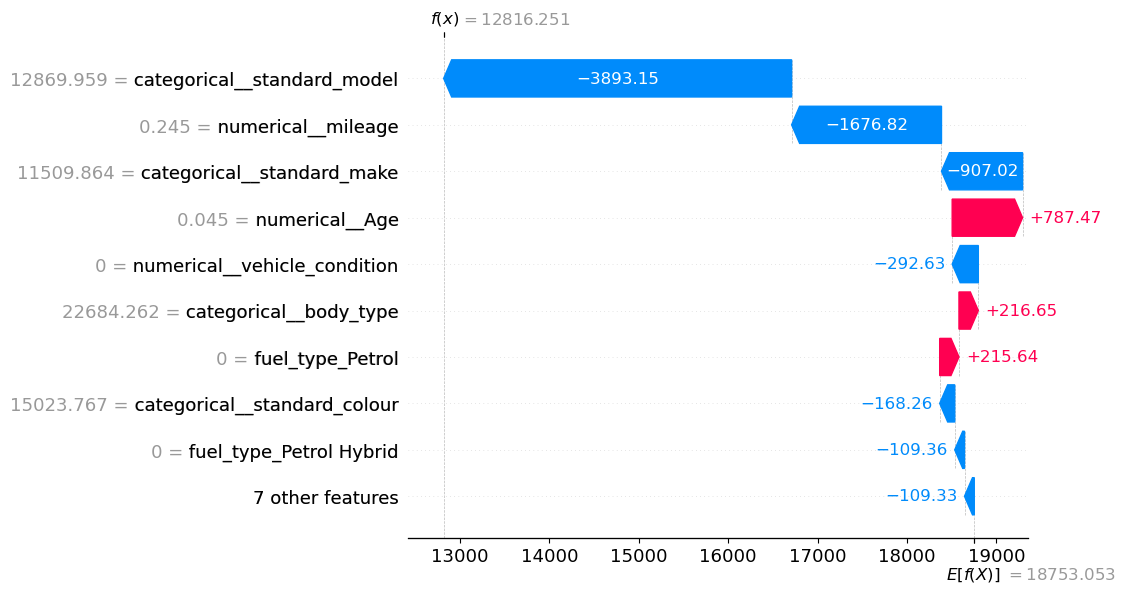

In [111]:
shap.waterfall_plot(shap_values[0])

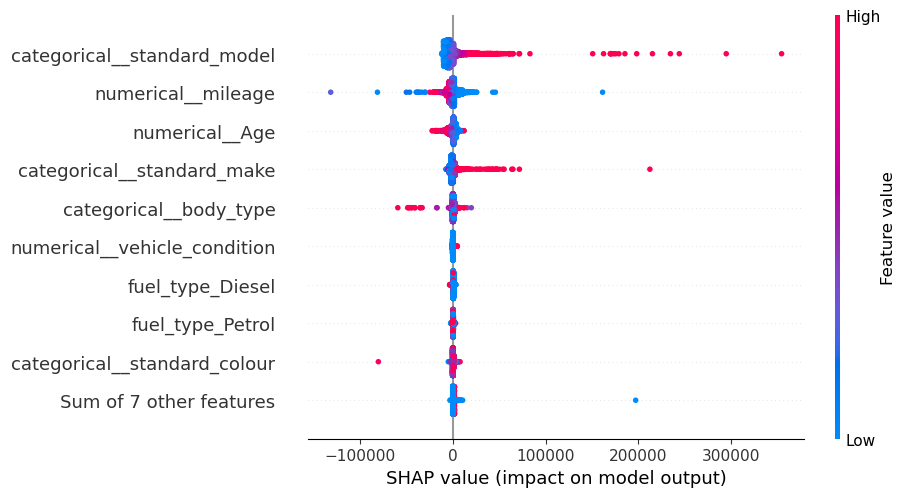

In [116]:
shap.plots.beeswarm(shap_values)

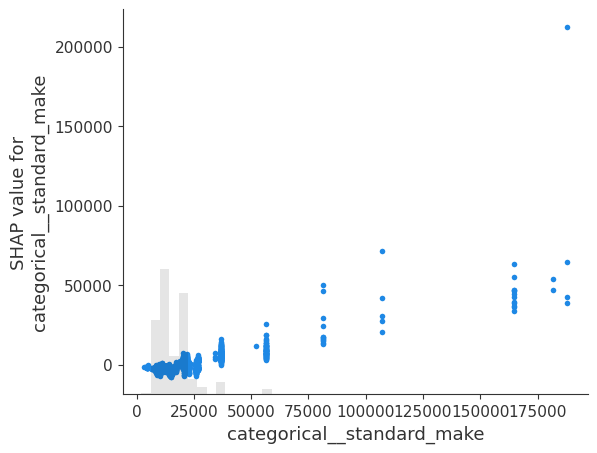

In [114]:
feature_index = X_test_samp.columns.get_loc('categorical__standard_make')
shap.plots.scatter(shap_values[:, feature_index])

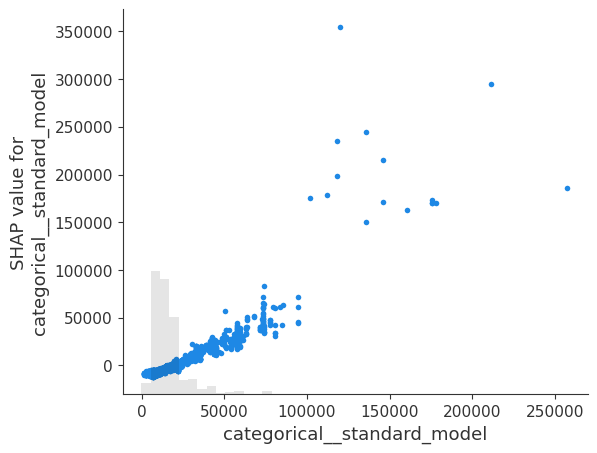

In [115]:
feature_index = X_test_samp.columns.get_loc('categorical__standard_model')
shap.plots.scatter(shap_values[:, feature_index])

<Figure size 400x400 with 0 Axes>

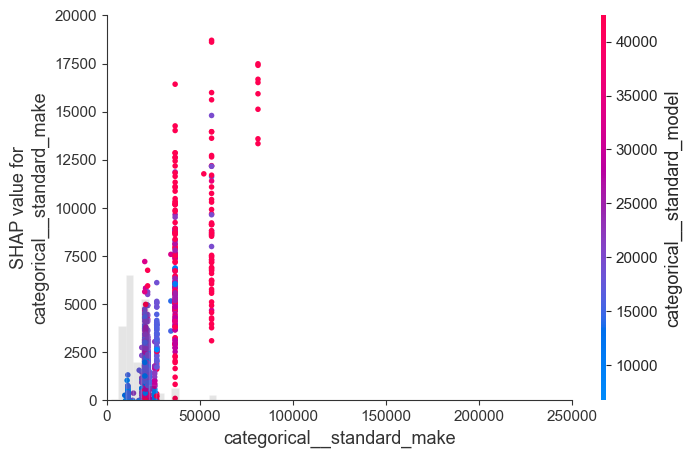

In [218]:
%matplotlib inline

# Set notebook display options
from IPython.display import display
from IPython.core.display import HTML

# Adjust the size of displayed plots
display(HTML("<style>.container { width:90% !important; }</style>"))

# Now create your plot
plt.figure(figsize=(4, 4)) 

model_shap_values = shap_values[:, X_test_samp.columns.get_loc('categorical__standard_make')]
body_type_shap_values = shap_values[:, X_test_samp.columns.get_loc('categorical__standard_model')]
display_sh = shap.plots.scatter(model_shap_values, color=body_type_shap_values, show=False)
ax = plt.gca()
ax.set_xlim(0, 250000)  
ax.set_ylim(0, 20000) 
plt.show()

<Figure size 400x400 with 0 Axes>

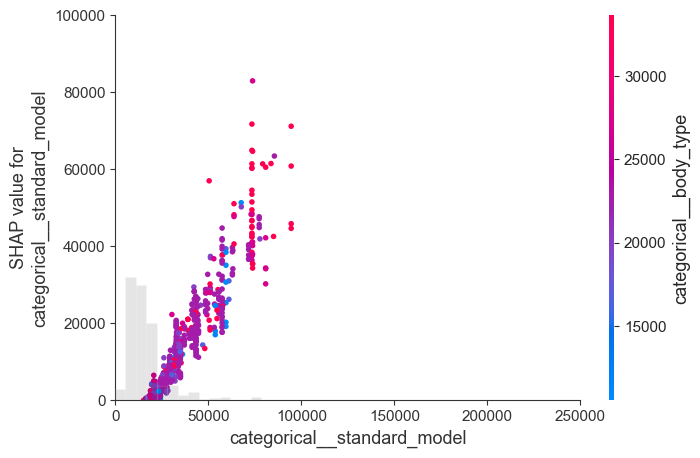

In [221]:
plt.figure(figsize=(4, 4)) 

# Extract the SHAP values for categorical__standard_model and categorical__body_type
model_shap_values = shap_values[:, X_test_samp.columns.get_loc('categorical__standard_model')]
body_type_shap_values = shap_values[:, X_test_samp.columns.get_loc('categorical__body_type')]
display_sh = shap.plots.scatter(model_shap_values, color=body_type_shap_values, show=False)
ax = plt.gca()
ax.set_xlim(0, 250000)  
ax.set_ylim(0, 100000) 
plt.show()

# Partial Dependency Plot(PDP)

In [117]:
from sklearn.inspection import PartialDependenceDisplay

In [118]:
X_test_samp.columns

Index(['categorical__standard_colour', 'categorical__standard_make',
       'categorical__standard_model', 'categorical__body_type',
       'numerical__mileage', 'numerical__vehicle_condition',
       'numerical__crossover_car_and_van', 'numerical__Age',
       'fuel_type_Bi Fuel', 'fuel_type_Diesel', 'fuel_type_Diesel Hybrid',
       'fuel_type_Diesel Plug-in Hybrid', 'fuel_type_Electric',
       'fuel_type_Petrol', 'fuel_type_Petrol Hybrid',
       'fuel_type_Petrol Plug-in Hybrid'],
      dtype='object')

In [125]:
plot_kwargs = {
    'line_kw': {'color': 'blue', 'linestyle': '-'},  # For individual lines
    'average_kw': {'color': 'red', 'linestyle': '--'},  # For the average line
}
import seaborn as sns
sns.set(
    { "figure.figsize": (8, 4) }, style='ticks', color_codes=True, font_scale=0.8
)

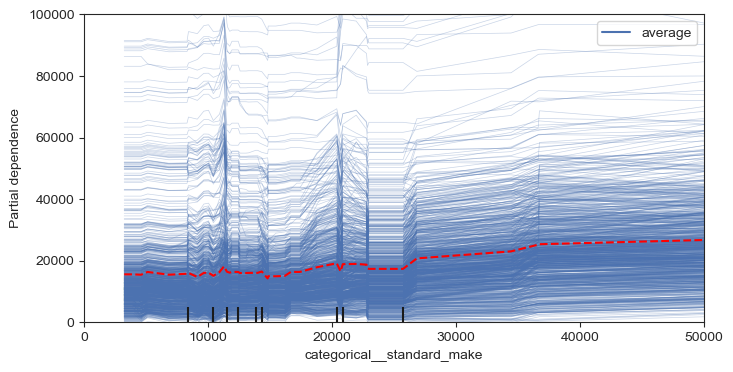

In [147]:
display = PartialDependenceDisplay.from_estimator(
    xg_reg_shap, X_test_samp, features=['categorical__standard_make'], kind='both'
)
axes = display.figure_.axes
for ax in axes:
    lines = ax.lines
    for line in lines:
        if line.get_label() == 'average':
            line.set_color('red')  
            line.set_linestyle('--')  
for ax in axes:
    ax.set_xlim(0, 50000) 
    ax.set_ylim(0,100000)   
plt.show()

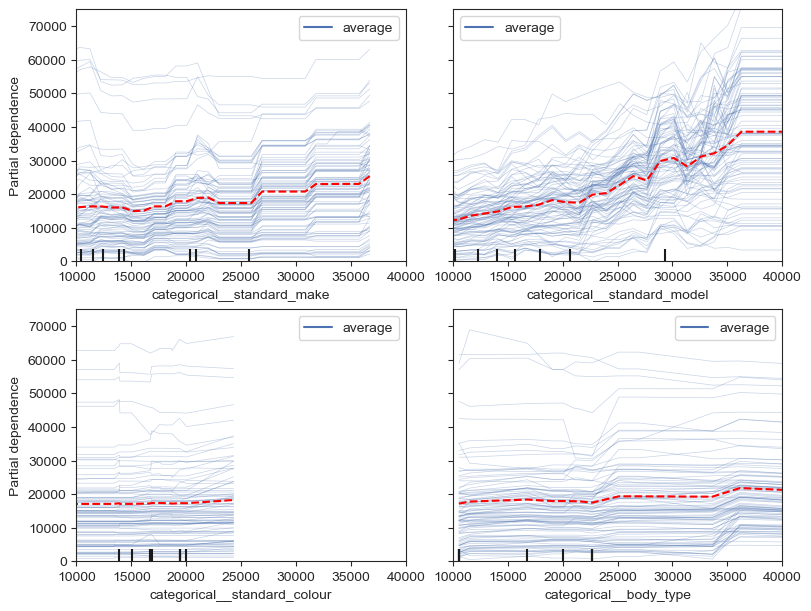

In [204]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
display1=PartialDependenceDisplay.from_estimator(
    xg_reg_shap, X_test_samp, features=['categorical__standard_make', 'categorical__standard_model','categorical__standard_colour','categorical__body_type'],
    kind='both',
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);
axes = display1.figure_.axes
for ax in axes:
    lines = ax.lines
    for line in lines:
        if line.get_label() == 'average':
            line.set_color('red')  
            line.set_linestyle('--')  
for ax in axes:
    ax.set_xlim(10000, 40000) 
    ax.set_ylim(0,75000)  
    
plt.show()